# regex test

In [ ]:
import os
import re

In [ ]:
os.getcwd()

In [ ]:
os.chdir(os.getcwd()+"/rmdup_bam/")

In [ ]:
os.listdir(os.getcwd())

In [ ]:
re.findall(r"(HI.\d+)", str(os.listdir(os.getcwd())))

In [ ]:
re.findall(r"(*)", str(os.listdir(os.getcwd())))

In [21]:
import sys
print(sys.version)

3.7.13 (default, Mar 29 2022, 02:18:16) 
[GCC 7.5.0]


# size distribution

In [320]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [322]:
os.chdir("/project/NeuralNet/CRC/crup/")

In [323]:
df = pd.read_csv("islets.merged.CRUP.clusterEnh.bed", sep="\t", header=None)
crupEnh = df[2] - df[1]  # 11341

In [324]:
os.chdir("/project/NeuralNet/CRC/Papers/EnhancerHub_PubMed31253982/")

In [325]:
df = pd.read_csv("islet.enhHubs.bed", sep="\t", header=None)
hubs = df[2] - df[1]  # 1318

df = pd.read_csv("islet.se.bed", sep="\t", header=None)
SE = df[2] - df[1]  # 770

df = pd.read_csv("islet.enhClusters.bed", sep="\t", header=None)
clusters = df[2] - df[1]  # 3677

df = pd.read_csv("islet.enhClusters.TF.bed", sep="\t", header=None)
clusters_TF = df[2] - df[1]  # 1813

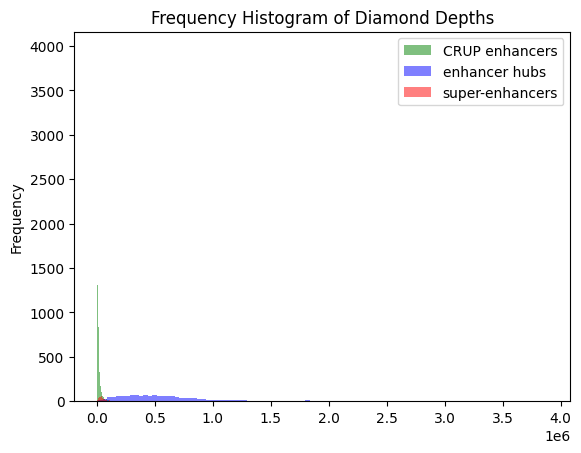

In [326]:
kwargs = dict(alpha=0.5, bins=100)

plt.hist(crupEnh, **kwargs, color='g', label='CRUP enhancers')
plt.hist(hubs, **kwargs, color='b', label='enhancer hubs')
plt.hist(SE, **kwargs, color='r', label='super-enhancers')
plt.gca().set(title='Frequency Histogram of Diamond Depths', ylabel='Frequency')
#plt.xlim(500, 4e6)
#plt.xticks(np.arange(500, 4e6, 1e3))
plt.legend();

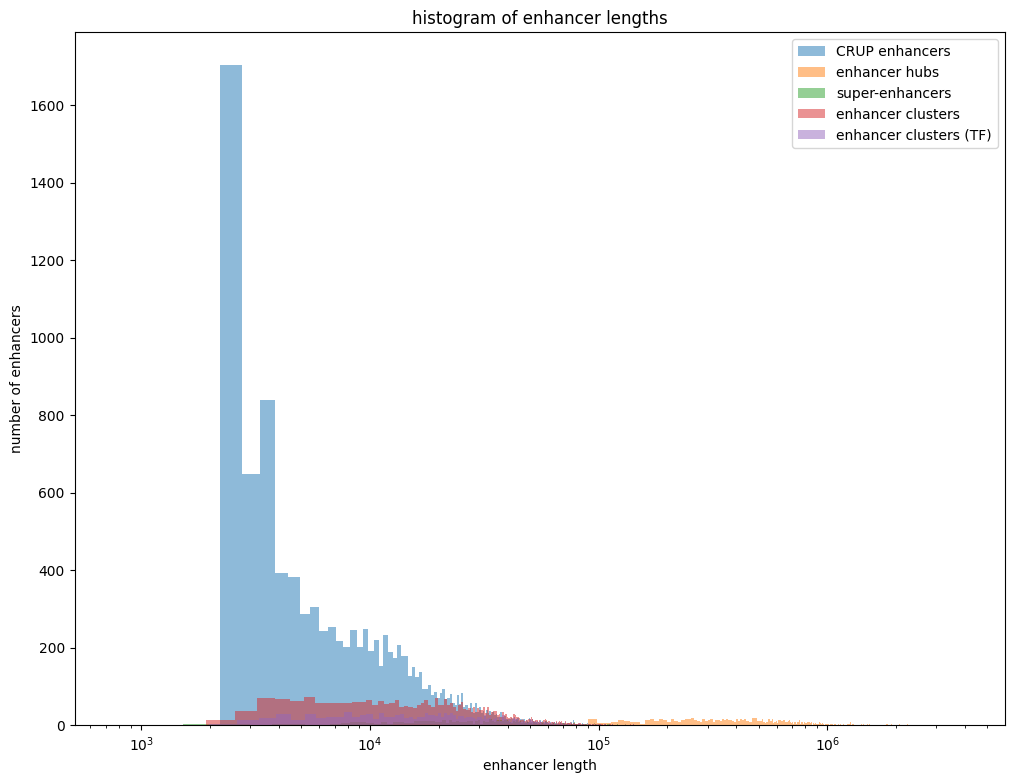

In [327]:
kwargs = dict(alpha=0.5, bins=500)

plt.figure(figsize=(12,9))

plt.hist(crupEnh, **kwargs, label='CRUP enhancers')
plt.hist(hubs, **kwargs, label='enhancer hubs')
plt.hist(SE, **kwargs, label='super-enhancers')
plt.hist(clusters, **kwargs, label='enhancer clusters')
plt.hist(clusters_TF, **kwargs, label='enhancer clusters (TF)')
plt.gca().set(title='histogram of enhancer lengths', ylabel='number of enhancers', xlabel="enhancer length")
plt.gca().set_xscale("log")
#plt.ylim(0, 1500)
#plt.yticks(np.arange(0, 1500, 300))
plt.legend()

/scratch/local/ipykernel_36346/1611280994.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(crupEnh, **kwargs, label='CRUP enhancers')
/scratch/local/ipykernel_36346/1611280994.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hubs, **kwargs, label='enhancer hubs')
/scratch/local/ipykernel_3

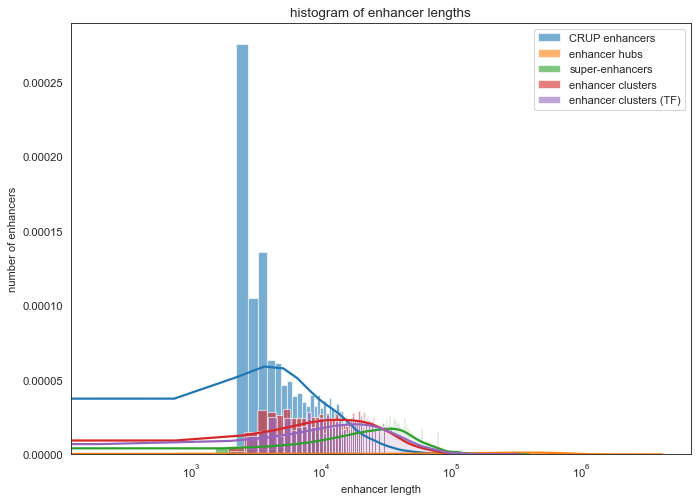

In [328]:
import seaborn as sns
sns.set_style("white")
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2}, bins=500)

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(crupEnh, **kwargs, label='CRUP enhancers')
sns.distplot(hubs, **kwargs, label='enhancer hubs')
sns.distplot(SE, **kwargs, label='super-enhancers')
sns.distplot(clusters, **kwargs, label='enhancer clusters')
sns.distplot(clusters_TF, **kwargs, label='enhancer clusters (TF)')

plt.gca().set(title='histogram of enhancer lengths', ylabel='number of enhancers', xlabel="enhancer length")
plt.gca().set_xscale("log")
plt.legend()

In [329]:
plt.close()

# Venn diagram

In [4]:
# import libraries
import sys
sys.path.append('/project/NeuralNet/software/miniconda3/envs/genetics/lib/python3.7/site-packages')
import matplotlib.pyplot as plt
from matplotlib_venn import venn2, venn2_circles

import numpy as np
import pandas as pd

In [5]:
df = pd.DataFrame(np.array(["CRUP enhancers", "enhancer hubs", 11341, 1318, 5989, 1314, 
                            "CRUP enhancers", "super-enhancers", 11341, 770, 836, 770, 
                            "CRUP enhancers", "enhancer clusters", 11341, 3677, 1258, 1091, 
                            "CRUP enhancers", "enhancer clusters (TF)", 11341, 1813, 697, 579]).reshape(4, 6),
                  columns=["bedA", "bedB", "A", "B", "A and B in A", "A and B in B"])

In [6]:
df = df.apply(pd.to_numeric, errors='ignore')
print(df.dtypes)
df

bedA            object
bedB            object
A                int64
B                int64
A and B in A     int64
A and B in B     int64
dtype: object


,bedA,bedB,A,B,A and B in A,A and B in B
0,CRUP enhancers,enhancer hubs,11341,1318,5989,1314
1,CRUP enhancers,super-enhancers,11341,770,836,770
2,CRUP enhancers,enhancer clusters,11341,3677,1258,1091
3,CRUP enhancers,enhancer clusters (TF),11341,1813,697,579


In [7]:
df["A and B in A (%)"] = df["A and B in A"] / df.A
df["A and B in B (%)"] = df["A and B in B"] / df.B
df["abbr_bedA"] = ["CE"] * 4
df["abbr_bedB"] = ["EH", "SE", "EC", "EC_TF"]

In [8]:
df.style.format({"A and B in A (%)": "{:.2%}", "A and B in B (%)": "{:.2%}"})

,bedA,bedB,A,B,A and B in A,A and B in B,A and B in A (%),A and B in B (%),abbr_bedA,abbr_bedB
0,CRUP enhancers,enhancer hubs,11341,1318,5989,1314,52.81%,99.70%,CE,EH
1,CRUP enhancers,super-enhancers,11341,770,836,770,7.37%,100.00%,CE,SE
2,CRUP enhancers,enhancer clusters,11341,3677,1258,1091,11.09%,29.67%,CE,EC
3,CRUP enhancers,enhancer clusters (TF),11341,1813,697,579,6.15%,31.94%,CE,EC_TF


## CRUP enhancers vs enhancer hubs overlap

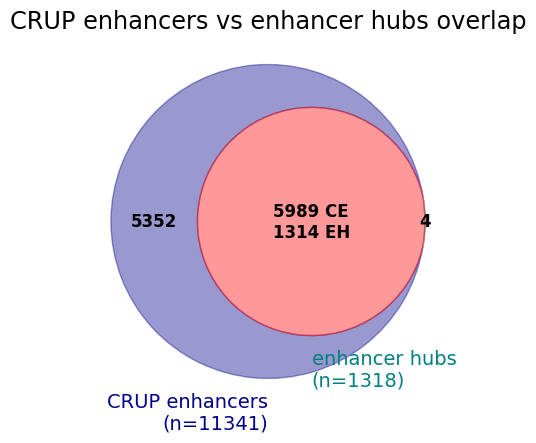

In [9]:
# Ab, aB, AB
# 10, 01, 11

v2 = venn2(subsets = {"10": (df.A - df["A and B in A"])[0],
                      "01": (df.B - df["A and B in B"])[0],
                      "11": df["A and B in A"][0]}, 
           set_labels = (f"{df.bedA[0]}\n(n={df.A[0]})", f"{df.bedB[0]}\n(n={df.B[0]})"))

colors = ["darkblue", "teal", "red"]
i = 0
for text in v2.set_labels:
    text.set_fontsize(14)                  #set label's fontsize 
    text.set_color(colors[i])                 #set label's font colour
    i += 1

IDs = ["10", "01", "11"]
i = 0
for ids in IDs:
    v2.get_patch_by_id(ids).set_color(colors[i])
    i += 1
    
for text in v2.subset_labels:
    text.set_fontsize(12)                #set circle's value fontsize 
    text.set_color('black')              #set circle's value font colour
    text.set_fontweight('bold')
    text.set_alpha(1)                    #set circle's value font transparency

v2.get_label_by_id('11').set_text(f'{df["A and B in A"][0]} {df.abbr_bedA[0]}\n{df["A and B in B"][0]} {df.abbr_bedB[0]}')

plt.title("CRUP enhancers vs enhancer hubs overlap", fontsize='xx-large', loc="center") #set title
plt.show()

## CRUP enhancers vs super-enhancers overlap

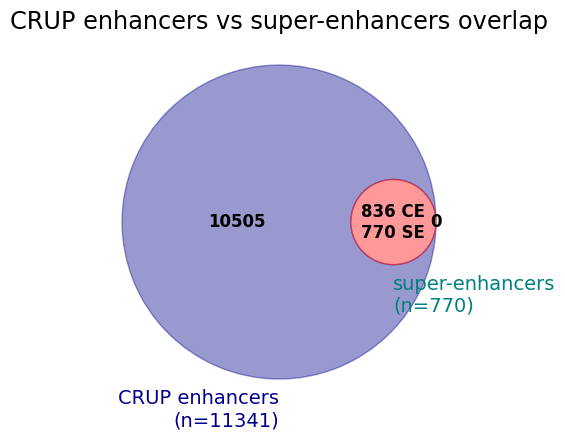

In [10]:
v2 = venn2(subsets = {"10": (df.A - df["A and B in A"])[1],
                      "01": (df.B - df["A and B in B"])[1],
                      "11": df["A and B in A"][1]}, 
           set_labels = (f"{df.bedA[1]}\n(n={df.A[1]})", f"{df.bedB[1]}\n(n={df.B[1]})"))

colors = ["darkblue", "teal", "red"]
i = 0
for text in v2.set_labels:
    text.set_fontsize(14)                  #set label's fontsize 
    text.set_color(colors[i])                 #set label's font colour
    i += 1

IDs = ["10", "01", "11"]
i = 0
for ids in IDs:
    v2.get_patch_by_id(ids).set_color(colors[i])
    i += 1
    
for text in v2.subset_labels:
    text.set_fontsize(12)                #set circle's value fontsize 
    text.set_color('black')              #set circle's value font colour
    text.set_fontweight('bold')
    text.set_alpha(1)                    #set circle's value font transparency

v2.get_label_by_id('11').set_text(f'{df["A and B in A"][1]} {df.abbr_bedA[1]}\n{df["A and B in B"][1]} {df.abbr_bedB[1]}')

plt.title("CRUP enhancers vs super-enhancers overlap", fontsize='xx-large', loc="center") #set title
plt.show()

## CRUP enhancers vs enhancer clusters overlap

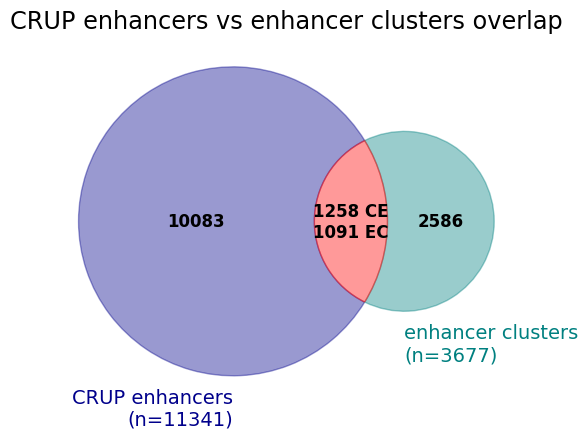

In [11]:
v2 = venn2(subsets = {"10": (df.A - df["A and B in A"])[2],
                      "01": (df.B - df["A and B in B"])[2],
                      "11": df["A and B in A"][2]}, 
           set_labels = (f"{df.bedA[2]}\n(n={df.A[2]})", f"{df.bedB[2]}\n(n={df.B[2]})"))

colors = ["darkblue", "teal", "red"]
i = 0
for text in v2.set_labels:
    text.set_fontsize(14)                  #set label's fontsize 
    text.set_color(colors[i])                 #set label's font colour
    i += 1

IDs = ["10", "01", "11"]
i = 0
for ids in IDs:
    v2.get_patch_by_id(ids).set_color(colors[i])
    i += 1
    
for text in v2.subset_labels:
    text.set_fontsize(12)                #set circle's value fontsize 
    text.set_color('black')              #set circle's value font colour
    text.set_fontweight('bold')
    text.set_alpha(1)                    #set circle's value font transparency

v2.get_label_by_id('11').set_text(f'{df["A and B in A"][2]} {df.abbr_bedA[2]}\n{df["A and B in B"][2]} {df.abbr_bedB[2]}')

plt.title("CRUP enhancers vs enhancer clusters overlap", fontsize='xx-large', loc="center") #set title
plt.show()

## CRUP enhancers vs enhancer clusters (highly bound by islet TFs) overlap

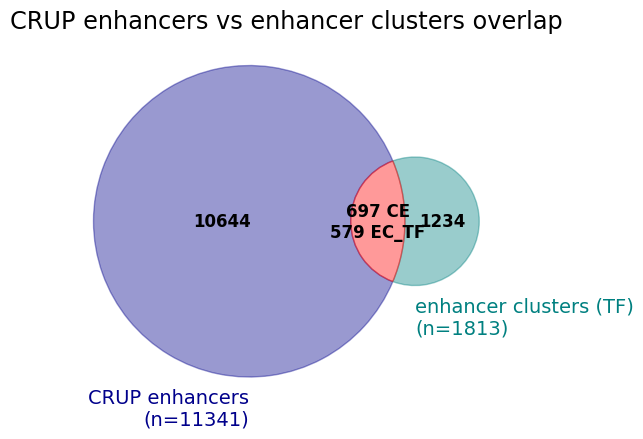

In [12]:
v2 = venn2(subsets = {"10": (df.A - df["A and B in A"])[3],
                      "01": (df.B - df["A and B in B"])[3],
                      "11": df["A and B in A"][3]}, 
           set_labels = (f"{df.bedA[3]}\n(n={df.A[3]})", f"{df.bedB[3]}\n(n={df.B[3]})"))

colors = ["darkblue", "teal", "red"]
i = 0
for text in v2.set_labels:
    text.set_fontsize(14)                  #set label's fontsize 
    text.set_color(colors[i])                 #set label's font colour
    i += 1

IDs = ["10", "01", "11"]
i = 0
for ids in IDs:
    v2.get_patch_by_id(ids).set_color(colors[i])
    i += 1
    
for text in v2.subset_labels:
    text.set_fontsize(12)                #set circle's value fontsize 
    text.set_color('black')              #set circle's value font colour
    text.set_fontweight('bold')
    text.set_alpha(1)                    #set circle's value font transparency

v2.get_label_by_id('11').set_text(f'{df["A and B in A"][3]} {df.abbr_bedA[3]}\n{df["A and B in B"][3]} {df.abbr_bedB[3]}')

plt.title("CRUP enhancers vs enhancer clusters overlap", fontsize='xx-large', loc="center") #set title
plt.show()

ref:

1. **[Matplotlib Series 6: Venn diagram](https://jingwen-z.github.io/data-viz-with-matplotlib-series6-venn-diagram/)**
2. [How to Create and Customize Venn Diagrams in Python](https://towardsdatascience.com/how-to-create-and-customize-venn-diagrams-in-python-263555527305)
3. [Venn Gogh](https://bernard-mlab.com/post/venn-gogh/)
4. [Professional Venn diagrams in Python](https://towardsdatascience.com/professional-venn-diagrams-in-python-638abfff39cc)

# SRR access list & renaming

In [ ]:
import pandas as pd
import numpy as np
import os
import re

In [ ]:
ls = pd.read_csv("./ChIP-seq/Meissner/SRR_ChIP-seq_acc_list.txt", header=0, index_col=None, sep="\t", usecols=range(1, 12))
ls.head(5)

In [ ]:
ls["abbr"] = pd.Series(["DE"]*6 + ["PP1"]*6 + ["PP2"]*4 + ["EN"]*6 + ["SC-beta"]*6 + ["PH"]*4 + ["alpha"]*2 + ["beta"]*2 + ["EN"]*2 + ["SC-beta"]*2 + ["PH"]*2)


antibody = []
for i in ls.chip_antibody:
    if re.match("H", i):
        antibody += [i.split(" ")[0]]
    else:
        antibody += ["WCE"]
ls["antibody"] = pd.Series(antibody)

rep = []
for i in ls.groupby(by=["abbr", "antibody"], sort=False).size():
    if i%4 == 0:
        rep += ["rep1"]*2 + ["rep2"]*2
    else:
        rep += ["rep1"]*2
ls["rep"] = pd.Series(rep)

ls["run"] = pd.Series(["run1", "run2"]*21)

ls["filename"] = pd.Series(["_".join(ls.loc[i, ["abbr", "antibody", "rep", "run"]]) for i in range(len(ls))])

In [ ]:
ls.tail()

In [ ]:
ls.to_csv("./ChIP-seq/Meissner/SRR_ChIP-seq_acc_list.txt", sep="\t", header=True, index=None)

In [ ]:
ls.shape

# macs2 parameter analysis

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [276]:
df = pd.read_csv("./ChIP-seq/Meissner/macs2_DE_analysis/DE_cutoff_analysis.txt", sep = "\t", header = 0)
df.head()

,pscore,qscore,npeaks,lpeaks,avelpeak
0,9.9,7.13,10025,5339449,532.61
1,9.6,6.84,10166,5431639,534.29
2,9.3,6.56,10496,5678185,540.99
3,9.0,6.27,10663,5808832,544.77
4,8.7,6.00,11354,6284931,553.54


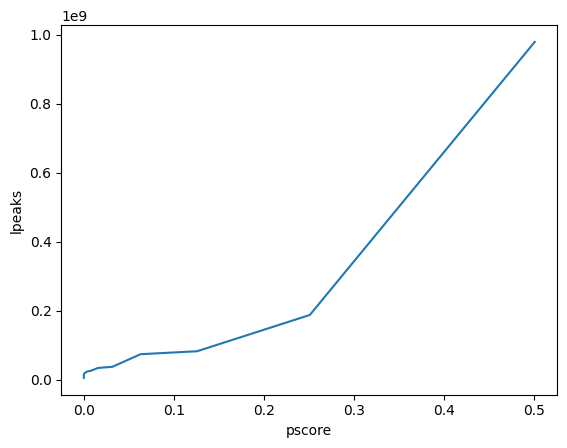

In [277]:
pvalue = 10 ** (-df.pscore)
sns.lineplot(x=pvalue,y=df.lpeaks)
# plt.xlim(0,2)
plt.show()

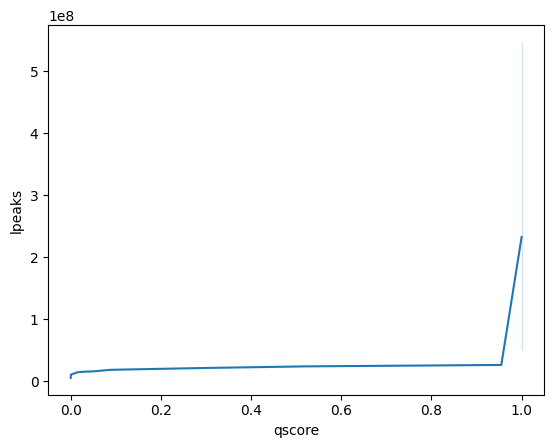

In [278]:
qvalue = 10 ** (-df.qscore)
sns.lineplot(x=qvalue,y=df.lpeaks)
# plt.xlim(0,2)
plt.show()

In [279]:
round(pvalue, 5).tail()

28    0.03162
29    0.06310
30    0.12589
31    0.25119
32    0.50119
Name: pscore, dtype: float64

In [280]:
df = pd.read_csv("./ChIP-seq/Meissner/macs2_Beta_analysis/NA_cutoff_analysis.txt", sep = "\t", header = 0)
df.head()

,pscore,qscore,npeaks,lpeaks,avelpeak
0,9.9,7.18,10787,5308856,492.15
1,9.6,6.90,11168,5538648,495.94
2,9.3,6.62,11611,5800013,499.53
3,9.0,6.33,11984,6051922,505.00
4,8.7,6.05,12457,6330574,508.19


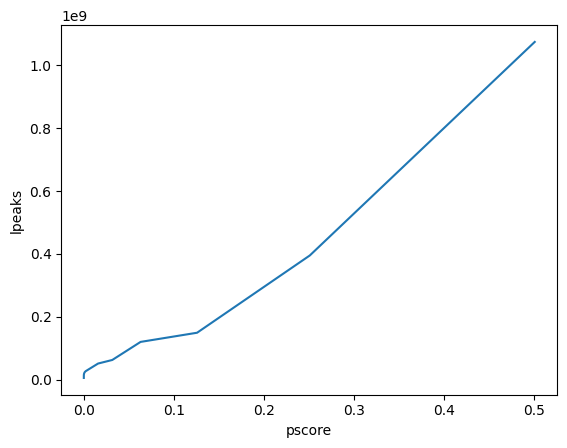

In [281]:
pvalue = 10 ** (-df.pscore)
sns.lineplot(x=pvalue,y=df.lpeaks)
#plt.xlim(0,2)
plt.show()

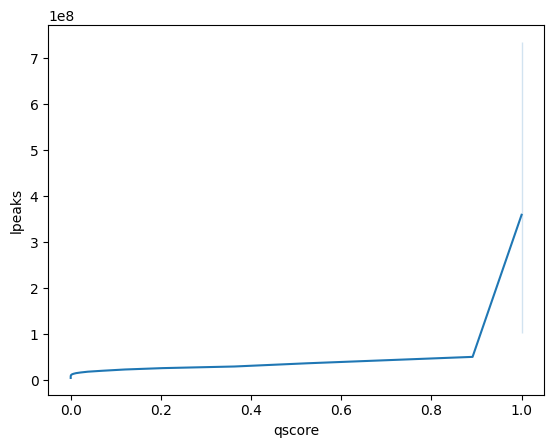

In [282]:
qvalue = 10 ** (-df.qscore)
sns.lineplot(x=qvalue,y=df.lpeaks)
# plt.xlim(0,2)
plt.show()

In [ ]:
round(pvalue, 5).tail()

## motif matrix

In [2]:
import re

In [1]:
testlist = ['ZXDB', 'ZXDA', 'ZNF33A', 'ZNF37A', 'ZNF248', 'ZNF25', 'NFIC', 'ARID3A', 'PAX6', 'CDC5L', 'SREBF1', 'MXD1', 'RELB', 'ZNF296', 'ZBTB4', 'SOX15', 'TP53', 'ZNF319', 'GZF1', 'FOXA2', 'RFX1', 'MLXIP', 'E4F1', 'MEIS1', 'CBFB', 'HSF4', 'E2F4', 'MEIS2', 'TCF3', 'NKX2-2', 'ZNF574', 'ZNF526', 'CIC', 'ERF', 'ZNF500', 'SIM1', 'NFATC2', 'SALL4', 'ZFP64', 'ZKSCAN5', 'ZNF655', 'ZKSCAN1', 'ZSCAN21', 'ZNF394', 'ZNF3', 'FOXP4', 'ISL1', 'BHLHE40', 'KLF10', 'PDX1', 'CDX2', 'SOX13', 'HES6', 'RFX3', 'ZBTB7B', 'NPAS4', 'GATA4', 'STAT5A', 'STAT5B', 'STAT3', 'MNX1', 'ZNF264', 'ZNF460', 'ZNF543', 'ZNF304', 'ZNF547', 'ZNF548', 'ZNF17', 'ZNF749', 'ZNF419', 'ZNF549', 'ZIK1', 'ZNF530', 'ZNF134', 'ZNF211', 'ZNF551', 'ZNF586', 'ZNF587', 'ZSCAN1', 'ZNF135', 'ZNF274', 'ZNF544', 'ZNF8', 'ZSCAN22', 'ZNF584', 'ZNF324', 'ZNF446', 'ZNF416', 'ZNF671', 'ZNF552', 'ZNF417', 'ZNF418', 'ZNF256', 'ZNF606', 'ZSCAN18', 'ZNF329', 'ZNF497', 'ZNF132', 'ZBTB45', 'MZF1', 'PPARA', 'PBX1', 'ZNF628', 'ZNF524', 'ZNF580', 'ZNF581', 'ZNF579', 'FIZ1', 'ZBTB7A', 'KLF9', 'ZNF696', 'ZNF623', 'MAFA', 'HIC1', 'ARID1A', 'ZNF572', 'NR4A2', 'BHLHE41', 'STAT2', 'MAZ', 'ZFHX3', 'VEZF1', 'ZNF740', 'SP1', 'RARG', 'HES1', 'GLIS2', 'TFAP4', 'PLAGL2', 'ZFP62', 'ZBTB17', 'ZNF33B', 'ZBED4', 'MAFF', 'SOX12', 'CREB3L4', 'THAP11', 'NFATC3', 'RREB1', 'NEUROD1', 'ATOH7', 'RFX2', 'ZNF48', 'ZNF771', 'ZNF785', 'ZNF689', 'NKX6-1', 'ZBTB3', 'RXRA', 'MEIS3', 'ZNF672', 'ZNF692', 'FOXJ1', 'ASCL2', 'ATF4', 'MYT1', 'ZNF697', 'TFEB', 'TFDP1', 'HIF1A', 'HIVEP2', 'ZNF142', 'RERE', 'JUN', 'TGIF1', 'ZBTB48', 'KLF13', 'NR3C1']

In [100]:
print('(?:% s)' % '|'.join(testlist))

(?:ZXDB|ZXDA|ZNF33A|ZNF37A|ZNF248|ZNF25|NFIC|ARID3A|PAX6|CDC5L|SREBF1|MXD1|RELB|ZNF296|ZBTB4|SOX15|TP53|ZNF319|GZF1|FOXA2|RFX1|MLXIP|E4F1|MEIS1|CBFB|HSF4|E2F4|MEIS2|TCF3|NKX2-2|ZNF574|ZNF526|CIC|ERF|ZNF500|SIM1|NFATC2|SALL4|ZFP64|ZKSCAN5|ZNF655|ZKSCAN1|ZSCAN21|ZNF394|ZNF3|FOXP4|ISL1|BHLHE40|KLF10|PDX1|CDX2|SOX13|HES6|RFX3|ZBTB7B|NPAS4|GATA4|STAT5A|STAT5B|STAT3|MNX1|ZNF264|ZNF460|ZNF543|ZNF304|ZNF547|ZNF548|ZNF17|ZNF749|ZNF419|ZNF549|ZIK1|ZNF530|ZNF134|ZNF211|ZNF551|ZNF586|ZNF587|ZSCAN1|ZNF135|ZNF274|ZNF544|ZNF8|ZSCAN22|ZNF584|ZNF324|ZNF446|ZNF416|ZNF671|ZNF552|ZNF417|ZNF418|ZNF256|ZNF606|ZSCAN18|ZNF329|ZNF497|ZNF132|ZBTB45|MZF1|PPARA|PBX1|ZNF628|ZNF524|ZNF580|ZNF581|ZNF579|FIZ1|ZBTB7A|KLF9|ZNF696|ZNF623|MAFA|HIC1|ARID1A|ZNF572|NR4A2|BHLHE41|STAT2|MAZ|ZFHX3|VEZF1|ZNF740|SP1|RARG|HES1|GLIS2|TFAP4|PLAGL2|ZFP62|ZBTB17|ZNF33B|ZBED4|MAFF|SOX12|CREB3L4|THAP11|NFATC3|RREB1|NEUROD1|ATOH7|RFX2|ZNF48|ZNF771|ZNF785|ZNF689|NKX6-1|ZBTB3|RXRA|MEIS3|ZNF672|ZNF692|FOXJ1|ASCL2|ATF4|MYT1|ZNF697|TFEB|TFDP

In [ ]:
with open('/project/ngsvin/bin/TRAP/Data/merged_matrices.TFP_2022.2.fa', 'r') as f:
    lines = f.readlines()
    mat = open('/project/NeuralNet/CRC/TRAP/merged_matrices.TFP_2022.2_subset_new.fa', 'w')
    for i in range(0, len(lines)): # len(lines)
        if lines[i].startswith('>V'):
            r = re.compile('/gene', flags=re.IGNORECASE)
            if re.findall(r, lines[i]):
                r = re.compile('|'.join(testlist), flags=re.IGNORECASE)
                if re.findall(r, lines[i]):
                    print(lines[i], end="")
                    mat.writelines(lines[i])
                    j = i+1
                    while not lines[j].startswith('>'):
                        print(lines[j], end="")
                        mat.writelines(lines[j])
                        j += 1
                        if j >= len(lines):
                            break;
    mat.close()
            
            

In [55]:
with open('/project/ngsvin/bin/TRAP/Data/merged_matrices.TFP_2022.2.fa', 'r') as f:
    motif2TFdict = {}
    for i in range(0, len(lines)): # len(lines)
        if lines[i].startswith('>V'):
            r = re.compile('/gene', flags=re.IGNORECASE)
            if re.findall(r, lines[i]):
                line = lines[i].replace('\n', '').split(' /')
                r = re.compile('name')
                name = list(filter(r.match, line))[0].split('=')[1]
                r = re.compile('gene')
                gene = list(filter(r.match, line))[0].split('=')[1]
                if gene not in motif2TFdict.keys():
                    motif2TFdict[gene] = []
                    motif2TFdict[gene].append(name)
                else:
                    motif2TFdict[gene].append(name)
# 1490 TF with 7353 motifs

# CRUP -> CRCmapper

In [22]:
# necessary functions
def parseTable(fn, sep, header = False,excel = False):
    '''takes in a table where columns are separated by a given symbol and outputs
    a nested list such that list[row][col]
    example call:
    table = parseTable('file.txt','\t')
    '''
    fh = open(fn)
    lines = fh.readlines()
    fh.close()
    if excel:
        lines = lines[0].split('\r')
    if lines[0].count('\r') > 0:
        lines = lines[0].split('\r')
    table = []
    if header == True:
        lines =lines[1:]
    for i in lines:
        table.append(i[:-1].split(sep))

    return table


def unParseTable(table, output, sep):
    '''takes in a table generated by parseTable and writes it to an output file
    takes as parameters (table, output, sep), where sep is how the file is delimited
    example call unParseTable(table, 'table.txt', '\t') for a tab del file
    '''
    fh_out = open(output,'w')
    if len(sep) == 0:
        for i in table:
            fh_out.write(str(i))
            fh_out.write('\n')
    else:
        for line in table:
            line = [str(x) for x in line]
            line = sep.join(line)

            fh_out.write(line)
            fh_out.write('\n')

    fh_out.close()
    

'''uniquify function by Peter Bengtsson Used under a creative commons license
sourced from  here: http://www.peterbe.com/plog/uniqifiers-benchmark
'''
def uniquify(seq, idfun=None):
    if idfun is None:
        def idfun(x): return x
    seen = {}
    result = []
    for item in seq:
        marker = idfun(item)
        if marker in seen: continue
        seen[marker] = 1
        result.append(item)
    return result


def makeSearchLocus(locus,upSearch,downSearch):
    '''takes a locus and expands it by a fixed upstream/downstream amount. spits out the new larger locus
    '''
    if locus.sense() == '-':
        searchLocus = Locus(locus.chr(),locus.start()-downSearch,locus.end()+upSearch,locus.sense(),locus.ID())
    else:
        searchLocus = Locus(locus.chr(),locus.start()-upSearch,locus.end()+downSearch,locus.sense(),locus.ID())
    return searchLocus


def importRefseq(refseqFile, returnMultiples = False):

    '''
    opens up a refseq file downloaded by UCSC
    '''
    refseqTable = parseTable(refseqFile,'\t')
    refseqDict = {}
    ticker = 1
    for line in refseqTable[1:]:
        if refseqDict.__contains__(line[1]):
            refseqDict[line[1]].append(ticker)
        else:
            refseqDict[line[1]] = [ticker]
        ticker = ticker + 1

    multiples = []
    for i in refseqDict:
        if len(refseqDict[i]) > 1:
            multiples.append(i)

    if returnMultiples == True:
        return refseqTable,refseqDict,multiples
    else:
        return refseqTable,refseqDict

    
def getTSSs(geneList,refseqTable,refseqDict):
    if len(geneList) == 0:
        refseq = refseqTable
    else:
        refseq = refseqFromKey(geneList,refseqDict,refseqTable)
    TSS = []
    for line in refseq:
        if line[3] == '+':
            TSS.append(line[4])
        if line[3] == '-':
            TSS.append(line[5])
    TSS = map(int,TSS)
    return TSS


def refseqFromKey(refseqKeyList,refseqDict,refseqTable):
    typeRefseq = []
    for name in refseqKeyList:
        if refseqDict.__contains__(name):
            typeRefseq.append(refseqTable[refseqDict[name][0]])
    return typeRefseq


def makeStartDict(annotFile,geneList = []):
    '''makes a dictionary keyed by refseq ID that contains information about 
    chrom/start/stop/strand/common name
    '''

    if type(geneList) == str:
        geneList = parseTable(geneList,'\t')
        geneList = [line[0] for line in geneList]
            
    if annotFile.upper().count('REFSEQ') == 1:
        refseqTable,refseqDict = importRefseq(annotFile)
        if len(geneList) == 0:
            geneList = refseqDict.keys()
        startDict = {}
        for gene in geneList:
            if refseqDict.__contains__(gene) == False:
                continue
            startDict[gene]={}
            startDict[gene]['sense'] = refseqTable[refseqDict[gene][0]][3]
            startDict[gene]['chr'] = refseqTable[refseqDict[gene][0]][2]
            startDict[gene]['start'] = [*getTSSs([gene],refseqTable,refseqDict)]
            if startDict[gene]['sense'] == '+':
                startDict[gene]['end'] =[int(refseqTable[refseqDict[gene][0]][5])]
            else:
                startDict[gene]['end'] = [int(refseqTable[refseqDict[gene][0]][4])]
            startDict[gene]['name'] = refseqTable[refseqDict[gene][0]][12]
    return startDict


def makeTSSLocus(gene,startDict,upstream,downstream):
    '''given a startDict, make a locus for any gene's TSS w/ upstream and downstream windows
    '''
    
    start = startDict[gene]['start'][0]
    if startDict[gene]['sense'] =='-':
        return Locus(startDict[gene]['chr'],start-downstream,start+upstream,'-',gene)
    else:
        return Locus(startDict[gene]['chr'],start-upstream,start+downstream,'+',gene)
    
    
def fetchSeq(directory,chrom,start,end,UCSC=False,lineBreaks=True,header = True):
    '''function that fetches a sequence from a genome directory
    directory that contains individual chrom fasta files
    '''
    fn = directory + chrom + '.fa'
    fh = open(fn,'r')
    headerOffset = 0
    nStart = 0
    nEnd = 0
    if header:
        fh.seek(0)
        headerOffset = len(fh.readline())
    if lineBreaks:

        nStart = int((start-1)/50)
        nEnd = int((end-1)/50)
    if UCSC:
        fh.seek((start+nStart+headerOffset))
    else:
        fh.seek((start-1+nStart+headerOffset))
    span = ((end+nEnd-1)-(start+nStart-1))

    read = fh.read(span)
    if lineBreaks:
        read = read.replace('\n','')

    return read
    fh.close()

    
class Locus:
    __chrDict = dict()
    __senseDict = {'+':'+', '-':'-', '.':'.'}
    def __init__(self,chr,start,end,sense,ID='',score=0):
        coords = [int(start),int(end)]
        # coords = [start, end]
        coords.sort(reverse=False)
        if not(self.__chrDict.__contains__(chr)): self.__chrDict[chr] = chr
        self._chr = self.__chrDict[chr]
        self._sense = self.__senseDict[sense]
        self._start = int(coords[0])
        self._end = int(coords[1])
        self._ID = ID
        self._score = score
    def ID(self): return self._ID
    def chr(self): return self._chr
    def start(self): return self._start
    def end(self): return self._end
    def len(self): return self._end - self._start + 1
    def score(self): return self._score
    def getAntisenseLocus(self):
        if self._sense=='.': return self
        else:
            switch = {'+':'-', '-':'+'}
            return Locus(self._chr,self._start,self._end,switch[self._sense])
    def coords(self): return [self._start,self._end]
    def sense(self): return self._sense
    def overlaps(self,otherLocus):
        if self.chr()!=otherLocus.chr(): return False
        elif not(self._sense=='.' or \
                 otherLocus.sense()=='.' or \
                 self.sense()==otherLocus.sense()): return False
        elif self.start() > otherLocus.end() or otherLocus.start() > self.end(): return False
        else: return True
    def contains(self,otherLocus):
        if self.chr()!=otherLocus.chr(): return False
        elif not(self._sense=='.' or \
                 otherLocus.sense()=='.' or \
                 self.sense()==otherLocus.sense()): return False
        elif self.start() > otherLocus.start() or otherLocus.end() > self.end(): return False
        else: return True
    def overlapsAntisense(self,otherLocus):
        return self.getAntisenseLocus().overlaps(otherLocus)
    def containsAntisense(self,otherLocus):
        return self.getAntisenseLocus().contains(otherLocus)
    def __hash__(self): return self._start + self._end
    def __eq__(self,other):
        if self.__class__ != other.__class__: return False
        if self.chr()!=other.chr(): return False
        if self.start()!=other.start(): return False
        if self.end()!=other.end(): return False
        if self.sense()!=other.sense(): return False
        return True
    def __ne__(self,other): return not(self.__eq__(other))
    def __str__(self): return self.chr()+'('+self.sense()+'):'+'-'.join(map(str,self.coords()))
    def plotStr(self): return self.chr() + ':' + self.sense() + ':' + '-'.join(map(str,self.coords()))
    def checkRep(self):
        pass
    def gffLine(self): return [self.chr(),self.ID(),'',self.start(),self.end(),'',self.sense(),'',self.ID()]
    
    
class LocusCollection:
    def __init__(self,loci,windowSize):
        self.__chrToCoordToLoci = dict()
        self.__loci = dict()
        self.__winSize = windowSize
        for lcs in loci: self.__addLocus(lcs)

    def __addLocus(self,lcs):
        if not(self.__loci.__contains__(lcs)):
            self.__loci[lcs] = None
            if lcs.sense()=='.': chrKeyList = [lcs.chr()+'+', lcs.chr()+'-']
            else: chrKeyList = [lcs.chr()+lcs.sense()]
            for chrKey in chrKeyList:
                if not(self.__chrToCoordToLoci.__contains__(chrKey)): self.__chrToCoordToLoci[chrKey] = dict()
                for n in self.__getKeyRange(lcs):
                    if not(self.__chrToCoordToLoci[chrKey].__contains__(n)): self.__chrToCoordToLoci[chrKey][n] = []
                    self.__chrToCoordToLoci[chrKey][n].append(lcs)
    def __getKeyRange(self,locus):
        start = int(locus.start() / self.__winSize)
        end = int(locus.end() / self.__winSize) + 1
        return range(start,end)
    def __len__(self): return len(self.__loci)
        
    def append(self,new): self.__addLocus(new)
    def extend(self,newList):
        for lcs in newList: self.__addLocus(lcs)
    def hasLocus(self,locus):
        return self.__loci.__contains__(locus)
    def remove(self,old):
        if not(self.__loci.__contains__(old)): raise ValueError("requested locus isn't in collection")
        del self.__loci[old]
        if old.sense()=='.': senseList = ['+','-']
        else: senseList = [old.sense()]
        for k in self.__getKeyRange(old):
            for sense in senseList:
                self.__chrToCoordToLoci[old.chr()+sense][k].remove(old)
    def getWindowSize(self): return self.__winSize
    def getLoci(self): return self.__loci.keys()
    def getChrList(self):
        tempKeys = dict()
        for k in self.__chrToCoordToLoci.keys(): tempKeys[k[:-1]] = None
        return tempKeys.keys()
            
    def __subsetHelper(self,locus,sense):
        sense = sense.lower()
        if ['sense','antisense','both'].count(sense)!=1:
            raise ValueError("sense command invalid: '"+sense+"'.")
        matches = dict()
        senses = ['+','-']
        if locus.sense()=='.' or sense=='both': lamb = lambda s: True
        elif sense=='sense': lamb = lambda s: s==locus.sense()
        elif sense=='antisense': lamb = lambda s: s!=locus.sense()
        else: raise ValueError("sense value was inappropriate: '"+sense+"'.")
        for s in filter(lamb, senses):
            chrKey = locus.chr()+s
            if self.__chrToCoordToLoci.__contains__(chrKey):
                for n in self.__getKeyRange(locus):
                    if self.__chrToCoordToLoci[chrKey].__contains__(n):
                        for lcs in self.__chrToCoordToLoci[chrKey][n]:
                            matches[lcs] = None
        return matches.keys()
    def getOverlap(self,locus,sense='sense'):
        matches = self.__subsetHelper(locus,sense)
        realMatches = dict()
        if sense=='sense' or sense=='both':
            for i in filter(lambda lcs: lcs.overlaps(locus), matches):
                realMatches[i] = None
        if sense=='antisense' or sense=='both':
            for i in filter(lambda lcs: lcs.overlapsAntisense(locus), matches):
                realMatches[i] = None 
        return realMatches.keys()
    def getContained(self,locus,sense='sense'):
        matches = self.__subsetHelper(locus,sense)
        realMatches = dict()
        if sense=='sense' or sense=='both':
            for i in filter(lambda lcs: locus.contains(lcs), matches):
                realMatches[i] = None
        if sense=='antisense' or sense=='both':
            for i in filter(lambda lcs: locus.containsAntisense(lcs), matches):
                realMatches[i] = None
        return realMatches.keys()
    def getContainers(self,locus,sense='sense'):
        matches = self.__subsetHelper(locus,sense)
        realMatches = dict()
        if sense=='sense' or sense=='both':
            for i in filter(lambda lcs: lcs.contains(locus), matches):
                realMatches[i] = None
        if sense=='antisense' or sense=='both':
            for i in filter(lambda lcs: lcs.containsAntisense(locus), matches):
                realMatches[i] = None
        return realMatches.keys()
    def stitchCollection(self,stitchWindow=1,sense='both'):
        locusList = self.getLoci()
        oldCollection = LocusCollection(locusList,500)
        stitchedCollection = LocusCollection([],500)
        for locus in locusList:
            if oldCollection.hasLocus(locus):
                oldCollection.remove(locus)
                overlappingLoci = oldCollection.getOverlap(Locus(locus.chr(),locus.start()-stitchWindow,locus.end()+stitchWindow,locus.sense(),locus.ID()),sense)
                stitchTicker = 1
                while len(overlappingLoci) > 0:
                    stitchTicker+=len(overlappingLoci)
                    overlapCoords = locus.coords()
                    for overlappingLocus in overlappingLoci:
                        overlapCoords+=overlappingLocus.coords()
                        oldCollection.remove(overlappingLocus)
                    if sense == 'both':
                        locus = Locus(locus.chr(),min(overlapCoords),max(overlapCoords),'.',locus.ID())
                    else:
                        locus = Locus(locus.chr(),min(overlapCoords),max(overlapCoords),locus.sense(),locus.ID())
                    overlappingLoci = oldCollection.getOverlap(Locus(locus.chr(),locus.start()-stitchWindow,locus.end()+stitchWindow,locus.sense()),sense)
                locus._ID = '%s_%s_lociStitched' % (stitchTicker,locus.ID())
                stitchedCollection.append(locus)
            else:
                continue
        return stitchedCollection
    def getLoci(self): return self.__loci.keys()

In [23]:
from subprocess import call
import networkx as nx

In [24]:
# input files
## for refseqToNameDict
annotationFile = './CRCmapper/CRCmapper_package/annotation/hg19_refseq_NM.ucsc'
annotTable = parseTable(annotationFile, '\t')

## refseqToNameDict
refseqToNameDict = {}
for line in annotTable[1:]:
    gid = line[1]
    genename = line[12].upper()
    refseqToNameDict[gid] = genename
# print(dict(list(refseqToNameDict.items())[0:5]))

## SuperTable
superFile = './ROSE/2.rose_Beta_narrow.05_broad.1_incltss/Beta_peaks_AllEnhancers.table.txt'
superTable = parseTable(superFile, '\t')

## SuperTable changed to tadTable
tadFile = './hg19.GSE63525_GM12878_50K.TopDom_10.bed'
tadTable = parseTable(tadFile, '\t')
for i in range(1, len(tadTable)+1):
    tadTable[i-1].append(f'hg19_TAD_{i}')
### chr start end type name 
## 3139

## enhancerNumber
## enhancerNumber = 500

## expressionTable
expressionFile = './CRCmapper/2-2.crc_Beta_narrow.05_broad.1_incltss_cutoff500/matrix.gff'
# expressionFile = './CRCmapper/1-1.crc_HI-32_K27ac_incltss/matrix.gff'
expressionTable = parseTable(expressionFile, '\t')

## TFfile
TFfile = './CRCmapper/CRCmapper_package/TFlist_NMid_hg.txt'
TFtable = parseTable(TFfile, '\t')
TFlist = [line[0] for line in TFtable]
TFlistGene = [line[1] for line in TFtable]

## subpeaks
subpeaks = './ChIP-seq/Meissner/macs2_Beta_narrow.05_broad.1/Beta_peaks.broadPeak'
# subpeaks = './crup/islets.HI-32.CRUP.singleEnh.bed'

## genomeDirectory FASTA (DNA sequences)
genomeDirectory = './CRCmapper/hg19/'

## motifExtension
motifExtension = 500

## expCutoff: top 2/3 of the genes are considered to be expressed
## expCutoff = 33

## Transfac.v$ZIC2_01 ZIC2
motifConvertFile = './CRCmapper/CRCmapper_package/MotifDictionary.txt'
# motifDatabase = parseTable(motifConvertFile, '\t')

## PWM (motifDatabaseFile)
PWMfile = './CRCmapper/CRCmapper_package/VertebratePWMs.txt'

In [25]:
projectFolder = './CRCmapper/2-2-TAD.crc_Beta_narrow.05_broad.1_incltss_cutoff500/'
projectName = 'Beta'

## .1 createTADLoci

In [26]:
def createTADLoci(tadTable, tadType='domain'):
    '''
    takes as input a ROSE SuperEnhancer table 
    output a table of loci for SuperEnhancers
    '''

    print('CREATING TAD LOCUS COLLECTION')

    output = []
    if tadType == 'domain':
        for line in tadTable:
            if line[3] == 'domain':
            # if line[3] == 'gap':
                locus = Locus(line[0], line[1], line[2], '.', line[4], float(0))
                output.append(locus)
                
    return output

In [27]:
tadLoci = createTADLoci(tadTable)
print(*tadLoci[:5])
print(len(tadLoci))

CREATING TAD LOCUS COLLECTION
chr1(.):700000-1300000 chr1(.):1850000-2600000 chr1(.):2600000-3350000 chr1(.):3350000-3850000 chr1(.):3950000-6000000
3139


In [28]:
def createSuperLoci(superTable, Enumber='super'):
    '''
    takes as input a ROSE SuperEnhancer table 
    output a table of loci for SuperEnhancers
    '''
    
    print('CREATING SUPER-ENHANCER LOCUS COLLECTION')
    
    output = []

    if Enumber == 'super':
        for line in superTable[6:]:
            if line[-1] == '1':
                locus = Locus(line[1], line[2], line[3], '.', line[0], (float(line[6])-float(line[7])))
                output.append(locus)
    else:
        end = 6+int(Enumber)
        for line in superTable[6:end]:
            locus = Locus(line[1], line[2], line[3], '.', line[0], (float(line[6])-float(line[7])))
            output.append(locus)

    return output

In [29]:
superLoci = createSuperLoci(superTable, 500)
print(*superLoci[:5])
len(superLoci)

CREATING SUPER-ENHANCER LOCUS COLLECTION
chr16(.):46386031-46435529 chr1(.):121458818-121485538 chr9_gl000199_random(.):30876-169007 chr4(.):49093615-49157018 chr10(.):42355279-42409601


500

In [378]:
'''
boundaryLoci = createTADLoci(tadTable)
print(*boundaryLoci[:5])
print(len(boundaryLoci))  # 1081
'''

CREATING TAD LOCUS COLLECTION
chr1(.):1300000-1650000 chr1(.):1650000-1850000 chr1(.):7800000-8000000 chr1(.):9650000-9950000 chr1(.):11850000-12150000
1081


In [392]:
'''
gapLoci = createTADLoci(tadTable)
print(*gapLoci[:5])
print(len(gapLoci))  # 206
'''

CREATING TAD LOCUS COLLECTION
chr1(.):0-700000 chr1(.):3850000-3950000 chr1(.):13000000-13750000 chr1(.):24300000-24350000 chr1(.):29900000-30000000
206


## .2 createExpressionDict

In [30]:
# expressedNM = createExpressionDict(annotationFile, projectFolder, projectName, refseqToNameDict, expressionTable)
expressedNMfile = './CRCmapper/2-2.crc_Beta_narrow.05_broad.1_incltss_cutoff500/Beta_EXPRESSED_TRANSCRIPTS.txt'
# expressedNMfile = './CRCmapper/1-1.crc_HI-32_K27ac_incltss/H3K27ac_HI-32_EXPRESSED_TRANSCRIPTS.txt'
with open(expressedNMfile, "r") as f:
    expressedNM = [line.rstrip('\n') for line in f]

**for checking the occurrence of CRC TF in the top 100 expressed TF**

In [31]:
matrixFile = './CRCmapper/2-2.crc_Beta_narrow.05_broad.1_incltss_cutoff500/matrix.gff'
matrix = parseTable(matrixFile, "\t")

In [11]:
matrix[0].append('GENE_NAME')
for line in matrix[1:]:
    line.append(refseqToNameDict[line[0]])

In [13]:
import pandas as pd
matrixDF = pd.DataFrame(matrix[1:], columns=matrix[0])
matrixDF.head(5)

,GENE_ID,locusLine,bin_1_Beta_H3K27ac.bam,GENE_NAME
0,NM_001122606,chrX(-):119602204-119604204,0.5063,LAMP2
1,NM_001145475,chr12(-):50789405-50791405,0.0444,FAM186A
2,NM_001103167,chr19(-):10419233-10421233,0.0472,ZGLP1
3,NM_001100880,chr15(-):80215077-80217077,1.1074,ST20
4,NM_005928,chr15(-):89455663-89457663,0.0791,MFGE8


In [14]:
matrixDF.sort_values(by=['bin_1_Beta_H3K27ac.bam'], ascending=False, inplace=True, ignore_index=True)

In [15]:
matrixDF.loc[matrixDF.GENE_NAME.isin(TFlistGene)].GENE_NAME.values[:100]

array(['BCLAF1', 'PRDM10', 'RFX3', 'CEBPD', 'HIVEP2', 'XBP1', 'ZFP91',
       'ZNF672', 'JUND', 'KLF7', 'SREBF1', 'ZBTB1', 'ZNF655', 'RFX1',
       'KLF6', 'ZNF655', 'JUN', 'NR3C1', 'NFE2L2', 'ZBTB25', 'NFE2L2',
       'NFKB1', 'ARID1B', 'ATF4', 'NFX1', 'NR1D2', 'ZBTB10', 'ZNF460',
       'ZNF335', 'KLF10', 'BHLHE40', 'NR1D1', 'SMAD2', 'SMAD2', 'SMAD2',
       'DDIT3', 'JUNB', 'MEIS2', 'TSC22D2', 'TEF', 'RELA', 'GABPA',
       'ZBTB4', 'GABPA', 'VEZF1', 'MEF2D', 'NFYA', 'STAT3', 'MYNN',
       'ZNF248', 'DEAF1', 'STAT3', 'THRB', 'NKX6-1', 'MZF1', 'ETV6',
       'FOSL2', 'THRB', 'MNT', 'NR3C1', 'MEIS2', 'SREBF2', 'SP3', 'KLF3',
       'ZFX', 'ZFX', 'ZFX', 'ZFY', 'NR2C2', 'CREM', 'DMTF1', 'MEF2A',
       'ZFX', 'ZBTB20', 'ZFY', 'SATB1', 'NFYC', 'ZNF143', 'KLF13',
       'PLAGL1', 'CREM', 'DMTF1', 'UBTF', 'REL', 'NFYC', 'ZNF292', 'SP3',
       'NR1D2', 'TFEB', 'ZBTB4', 'ZSCAN18', 'YY1', 'ZNF441', 'CEBPG',
       'PAX6', 'GMEB2', 'ZHX2', 'RERE', 'FOS', 'FIZ1'], dtype=object)

In [297]:
matrixDF.loc[matrixDF.GENE_NAME.isin(TFlistGene)][:10]

,GENE_ID,locusLine,bin_1_Beta_H3K27ac.bam,GENE_NAME
4,NM_014739,chr6(-):136609989-136611989,4.2922,BCLAF1
11,NM_020228,chr11(-):129871730-129873730,3.7751,PRDM10
13,NM_002919,chr9(-):3524983-3526983,3.7106,RFX3
25,NM_005195,chr8(-):48649726-48651726,3.4413,CEBPD
32,NM_006734,chr6(-):143265338-143267338,3.3689,HIVEP2
35,NM_005080,chr22(-):29195560-29197560,3.3415,XBP1
37,NM_053023,chr11(+):58345586-58347586,3.3251,ZFP91
40,NM_024836,chr1(+):249131529-249133529,3.3103,ZNF672
45,NM_005354,chr19(-):18391432-18393432,3.2566,JUND
50,NM_003709,chr2(-):208029614-208031614,3.2019,KLF7


In [47]:
selfLoops = ['ARID3A', 'PAX6', 'CDC5L', 'SREBF1', 'SOX15', 'TP53', 'GZF1', 'FOXA2', 'RFX1', 'E4F1', 'MEIS1', 'HSF4', 'E2F4', 'MEIS2', 'TCF3', 'NKX2-2', 'ERF', 'NFATC2', 'ISL1', 'BHLHE40', 'PDX1', 'CDX2', 'SOX13', 'RFX3', 'ZBTB7B', 'GATA4', 'STAT5A', 'STAT5B', 'STAT3', 'MNX1', 'PPARA', 'PBX1', 'ZBTB7A', 'MAFA', 'HIC1', 'NR4A2', 'BHLHE41', 'STAT2', 'MAZ', 'ZNF740', 'SP1', 'RARG', 'HES1', 'GLIS2', 'TFAP4', 'MAFF', 'SOX12', 'RREB1', 'NEUROD1', 'RFX2', 'NKX6-1', 'ZBTB3', 'RXRA', 'MEIS3', 'FOXJ1', 'ASCL2', 'ATF4', 'TFEB', 'HIF1A', 'HIVEP2', 'JUN', 'KLF13', 'NR3C1']

In [300]:
testlist = []
for TF in selfLoops:
    if TF in matrixDF.loc[matrixDF.GENE_NAME.isin(TFlistGene)].GENE_NAME.values[:50]:
        testlist.append(TF)
        print(TF)
print(len(testlist))

SREBF1
RFX1
MEIS2
BHLHE40
RFX3
STAT3
ATF4
HIVEP2
JUN
NR3C1
10


## .3 findCanidateTFs

In [32]:
def findCanidateTFs(annotationFile, tadLoci, expressedNM, TFlist, refseqToNameDict):
    '''
    find all TFs that are considered expressed within a TAD
    return a dictionary keyed by TAD loci that points to a list of TFs that are contained within the TAD
    '''

    print('FINDING CANIDATE TFs')
    
    startDict = makeStartDict(annotationFile)
    
    # Find the location of the TSS of all transcripts (NMid) considered expressed
    tssLoci = []
    for geneID in expressedNM:
        tssLoci.append(makeTSSLocus(geneID,startDict,0,0))  # 1bp region
    tssCollection = LocusCollection(tssLoci,50)

    # Assign all transcripts (NMid) that are TFs to a TAD if it is within the TAD
    tadAssignment = []
    tadAssignmentGene = []
    TFandTADdict = {}
    
    for tad in tadLoci:
        
        # Find all transcripts whose TSS occur within a TAD
        searchLocus = Locus(tad.chr(), tad.start(), tad.end(), '.')
        allEnhancerLoci = tssCollection.getOverlap(searchLocus)
        allEnhancerGenes = [locus.ID() for locus in allEnhancerLoci]
        
        geneName = [refseqToNameDict[gene] for gene in allEnhancerGenes if gene in TFlist]
        
        # Select the transcript if it is a TF, and allow for a TAD to have multiple TF genes inside
        if geneName != []:
            for gene in allEnhancerGenes:
                if gene in TFlist and tad not in TFandTADdict.keys():
                    TFandTADdict[tad] = [gene]
                elif gene in TFlist and tad in TFandTADdict.keys():
                    TFandTADdict[tad].append(gene)
            tadAssignment.append([tad.chr(), tad.start(), tad.end(), TFandTADdict[tad]])
            tadAssignmentGene.append([tad.chr(), tad.start(), tad.end(), geneName])
        else:
            TFandTADdict[tad] = []
    
    print(f'Number of TADs that contains TF genes: {len(tadAssignment)}, {len(tadAssignmentGene)}')
    

    return tadAssignment, tadAssignmentGene, TFandTADdict
        

In [11]:
# expressed TF genes in total 821
totalList = uniquify([refseqToNameDict[gene] for gene in expressedNM if gene in TFlist])
print(f'expressed TF genes: {len(totalList)}')
print('----------------------------------------------------------')

# TAD domain
tadAssignment, tadAssignmentGene, TFandTADdict = findCanidateTFs(annotationFile, tadLoci, expressedNM, TFlist, refseqToNameDict)
# 683 unique geneName in TAD domain
count = 0
geneList = []
for line in tadAssignmentGene:
    count += len(line[3])
    geneList += line[3]
tadList = uniquify(geneList)
print(f'TF genes in TAD domain: {count}, {len(tadList)}')
print('----------------------------------------------------------')
'''
# TAD boundary
boundaryAssignment, boundaryAssignmentGene, boundaryTFandTADdict = findCanidateTFs(annotationFile, boundaryLoci, expressedNM, TFlist, refseqToNameDict)
# 133 unique geneName in TAD boundary
count = 0
geneList = []
for line in boundaryAssignmentGene:
    count += len(line[3])
    geneList += line[3]
boundaryList = uniquify(geneList)
print(f'TF genes in TAD boundary: {count}, {len(boundaryList)}')
print('----------------------------------------------------------')

# TAD gap
gapAssignment, gapAssignmentGene, gapTFandTADdict = findCanidateTFs(annotationFile, gapLoci, expressedNM, TFlist, refseqToNameDict)
# 4 unique geneName in TAD gap
count = 0
geneList = []
for line in gapAssignmentGene:
    count += len(line[3])
    geneList += line[3]
gapList = uniquify(geneList)
print(f'TF genes in TAD gap: {count}, {len(gapList)}')
print('----------------------------------------------------------')

# 2 genes that are neither in domain, boudary, nor gap
notList = []
for gene in totalList:
    if gene not in set(tadList):
        if gene not in set(boundaryList):
            if gene not in set(gapList):
                notList.append(gene)
print(f'TF genes not in TAD domain, boundary, gap: {len(uniquify(notList))}, {notList}')
print('----------------------------------------------------------')
    
print(f'TF genes in TAD domain, boundary, and gap: {len(tadList) + len(boundaryList) + len(gapList) + len(uniquify(notList))}')
print(f'number equals? {len(tadList) + len(boundaryList) + len(gapList) + len(uniquify(notList)) == len(totalList)}')
print('----------------------------------------------------------')


duplicatedGenes = []
for gene in totalList:
    if gene in set(tadList) and gene in set(boundaryList):
        duplicatedGenes.append(gene)
print(f'genes located in both TAD domain and TAD boundary: {duplicatedGenes}')
'''

expressed TF genes: 821
----------------------------------------------------------
FINDING CANIDATE TFs
Number of TADs that contains TF genes: 438, 438
TF genes in TAD domain: 832, 683
----------------------------------------------------------


"\n# TAD boundary\nboundaryAssignment, boundaryAssignmentGene, boundaryTFandTADdict = findCanidateTFs(annotationFile, boundaryLoci, expressedNM, TFlist, refseqToNameDict)\n# 133 unique geneName in TAD boundary\ncount = 0\ngeneList = []\nfor line in boundaryAssignmentGene:\n    count += len(line[3])\n    geneList += line[3]\nboundaryList = uniquify(geneList)\nprint(f'TF genes in TAD boundary: {count}, {len(boundaryList)}')\nprint('----------------------------------------------------------')\n\n# TAD gap\ngapAssignment, gapAssignmentGene, gapTFandTADdict = findCanidateTFs(annotationFile, gapLoci, expressedNM, TFlist, refseqToNameDict)\n# 4 unique geneName in TAD gap\ncount = 0\ngeneList = []\nfor line in gapAssignmentGene:\n    count += len(line[3])\n    geneList += line[3]\ngapList = uniquify(geneList)\nprint(f'TF genes in TAD gap: {count}, {len(gapList)}')\nprint('----------------------------------------------------------')\n\n# 2 genes that are neither in domain, boudary, nor gap\nnot

In [33]:
# TAD domain
tadAssignment, tadAssignmentGene, TFandTADdict = findCanidateTFs(annotationFile, tadLoci, expressedNM, TFlist, refseqToNameDict)

FINDING CANIDATE TFs
Number of TADs that contains TF genes: 438, 438


In [34]:
print(len(tadAssignment))
tadAssignment[:5]

438


[['chr1', 700000, 1300000, ['NM_021170']],
 ['chr1', 2600000, 3350000, ['NM_199454']],
 ['chr1', 6000000, 6750000, ['NM_005341']],
 ['chr1', 6750000, 7800000, ['NM_001195563']],
 ['chr1', 8450000, 8950000, ['NM_001042682', 'NM_012102']]]

In [35]:
print(len(tadAssignmentGene))
tadAssignmentGene[:5]

438


[['chr1', 700000, 1300000, ['HES4']],
 ['chr1', 2600000, 3350000, ['PRDM16']],
 ['chr1', 6000000, 6750000, ['ZBTB48']],
 ['chr1', 6750000, 7800000, ['CAMTA1']],
 ['chr1', 8450000, 8950000, ['RERE', 'RERE']]]

In [36]:
print(len(TFandTADdict))
dict(list(TFandTADdict.items())[:5])

3139


{<__main__.Locus at 0x7f68aa57f4d0>: ['NM_021170'],
 <__main__.Locus at 0x7f68aa57f3d0>: [],
 <__main__.Locus at 0x7f68aa57f350>: ['NM_199454'],
 <__main__.Locus at 0x7f68aa560710>: [],
 <__main__.Locus at 0x7f68aa560810>: []}

In [16]:
# for visualization
# {'# of genes': '# of TADs that contain genes'}
countDict = {}
for line in tadAssignmentGene:
    l = len(uniquify(line[3]))
    if l == 39:
        print(line)
    if l not in countDict.keys():
        countDict[len(uniquify(line[3]))] = 1
    else:
        countDict[len(uniquify(line[3]))] += 1
        
countDict[0] = len(TFandTADdict) - len(tadAssignmentGene)
countDict

['chr19', 57650000, 59128983, ['ZNF264', 'ZNF460', 'ZNF543', 'ZNF304', 'ZNF547', 'ZNF548', 'ZNF17', 'ZNF749', 'ZNF419', 'ZNF549', 'ZIK1', 'ZNF530', 'ZNF134', 'ZNF211', 'ZNF551', 'ZNF586', 'ZNF587', 'ZSCAN1', 'ZNF135', 'ZNF274', 'ZNF544', 'ZNF8', 'ZSCAN22', 'ZNF584', 'ZNF324', 'ZNF446', 'ZNF416', 'ZNF671', 'ZNF552', 'ZNF417', 'ZNF418', 'ZNF256', 'ZNF606', 'ZSCAN18', 'ZNF329', 'ZNF497', 'ZNF132', 'ZBTB45', 'MZF1']]


{1: 371,
 3: 12,
 2: 35,
 4: 4,
 5: 2,
 7: 2,
 17: 1,
 20: 1,
 19: 1,
 13: 1,
 21: 1,
 6: 5,
 9: 1,
 39: 1,
 0: 2701}

In [17]:
genes = []
for tad in TFandTADdict.keys():
    if len(TFandTADdict[tad]) != 0:
        for gene in TFandTADdict[tad]:
            genes.append(gene)
len(genes)
len(uniquify(genes))
# genes'NMid in TFandTADdict are unique
# TADs are also unique

832

In [18]:
def formatOutput(TFandTADdict, refseqToNameDict, projectName, projectFolder):
    '''
    takes as input the dictionary mapping TFs to all proximal super-enhancers
    returns a file that lists each candidate TFs
    and gives the coordinates of the super-enhancers around them
    '''
    print('CREATE TABLE')
    
    output = [['chr', 'start', 'end', 'tadID', 'TF_NMid', 'TF_name']]
    
    used = []
    
    for tad in TFandTADdict.keys():
        for gene in TFandTADdict[tad]:
            newline = [tad.chr(), tad.start(), tad.end(), tad.ID()]
            newline.append(gene)
            newline.append(refseqToNameDict[gene])
            output.append(newline)
    
    outputname = projectFolder + projectName + '_CANDIDATE_TF_AND_TAD_TABLE.txt'
    unParseTable(output, outputname, '\t')
    
    return 1

In [19]:
formatOutput(TFandTADdict, refseqToNameDict, projectName, projectFolder)

CREATE TABLE


1

## .4 generateSubpeakFASTA

In [23]:
# subpeaks = SE subpeaks + remaining peaks in the TAD
def generateSubpeakFASTA(TFandTADdict, superLoci, subpeaks, genomeDirectory, motifExtension, projectName, projectFolder):
    '''
    keep TADs that overlap SE, and output peaks in the TADs
    '''
    print('MAKE FASTA')
    
    # make bed file
    subpeakDict = {}
    subpeakBED = [['track name=' + projectName + ' color=204,0,204']]
    subpeakTable = parseTable(subpeaks, '\t')
    
    # subpeakCollection contains all peaks called from macs2
    subpeakLoci = [Locus(l[0], int(l[1]), int(l[2]), '.') for l in subpeakTable]
    subpeakCollection = LocusCollection(subpeakLoci, 50)  # macs2 broadPeaks
    
    # subTADloci contains all TAD regions that have at least 1 TF gene
    subTADloci = [tad for tad in TFandTADdict.keys() if len(TFandTADdict[tad]) != 0]  # len(subTADloci)
    subTADcollection = LocusCollection(subTADloci, 50)
    
    used = {}
    
    for loci in superLoci:
        subTAD_overlap_SE = list(subTADcollection.getOverlap(loci))  # subTAD regions that fully contain 1 or more superLoci
        
        if not subTAD_overlap_SE: continue;  # if subTAD_overlap_SE is empty
            
        else:  # if such subTAD exists
            for subTAD in subTAD_overlap_SE:  # for loop is for the case that one SE overlap two or more TADs
                if subTAD in used.keys(): continue;  # uniq subTAD_containing_SE
                
                used[subTAD] = None
            
                if len(TFandTADdict[subTAD]) <= 5:  # currently only test TADs that only have 1 TF genes
                    for gene in TFandTADdict[subTAD]:
                        subpeakDict[gene] = []
                        overlaps = subpeakCollection.getOverlap(subTAD)  # broadPeaks that overlaps the TAD
                        extendedOverlaps = [makeSearchLocus(x, motifExtension, motifExtension) for x in overlaps]  # extends the overlapped broadPeaks by # of motifExtension
                
                        overlapCollectionTemp = LocusCollection(extendedOverlaps, 50)
                        overlapCollection = overlapCollectionTemp.stitchCollection()  # links the overlapped broadPeaks that overlaps each other

                        for overlap in overlapCollection.getLoci():
                            subpeakBED.append([overlap.chr(), overlap.start(), overlap.end()])
                            subpeakDict[gene].append(overlap)
                  
    bedfilename = projectFolder + projectName + '_subpeaks.bed'
    unParseTable(subpeakBED, bedfilename, '\t')
    print(f'writing subpeakBED to {bedfilename}')
    
    # make fasta file
    fasta = []
    
    for gene in subpeakDict:
        for subpeak in subpeakDict[gene]:
            
            fastaTitle = gene + '|'  + subpeak.chr() + '|' + str(subpeak.start()) + '|' + str(subpeak.end())
            fastaLine = fetchSeq(genomeDirectory, subpeak.chr(), int(subpeak.start()+1), int(subpeak.end()+1))
            
            fasta.append('>' + fastaTitle)
            fasta.append(fastaLine.upper())
    
    outname = projectFolder + projectName + '_SUBPEAKS.fa'
    unParseTable(fasta, outname, '')
    print(f'writing subpeakDict to {outname}')
     
    
    return subpeakBED, subpeakDict, used

In [24]:
subpeakBED, subpeakDict, used = generateSubpeakFASTA(TFandTADdict, superLoci, subpeaks, genomeDirectory, motifExtension, projectName, projectFolder)


MAKE FASTA
writing subpeakBED to ./CRCmapper/2-2-TAD.crc_Beta_narrow.05_broad.1_incltss_cutoff500/Beta_subpeaks.bed
writing subpeakDict to ./CRCmapper/2-2-TAD.crc_Beta_narrow.05_broad.1_incltss_cutoff500/Beta_SUBPEAKS.fa


---

In [20]:
# subTADloci contains all TAD regions that have at least 1 TF gene
subTADloci = [tad for tad in TFandTADdict.keys() if len(TFandTADdict[tad]) != 0]  # len(subTADloci) = 438
subTADcollection = LocusCollection(subTADloci, 50)

In [21]:
print(f'number of TAD domains: {len(tadLoci)}')
print(f'number of TADs that have at least 1 TF gene: {len(subTADloci), subTADcollection.__len__()}')
print(f'number of Super-enhancers: {len(superLoci)}')

number of TAD domains: 3139
number of TADs that have at least 1 TF gene: (438, 438)
number of Super-enhancers: 500


In [22]:
# for visualization
nonOverlapSEcount = 0
overlapSEcount = 0
containSEcount = 0
for loci in superLoci:
    if subTADcollection.getOverlap(loci):
        subTAD_containing_SE = list(subTADcollection.getContainers(loci))
        if subTAD_containing_SE:  # if subTAD_containing_SE is not empty, this means the SE is fully contained within one TAD domain
            containSEcount += 1
            # print(loci, '\t', *subTAD_containing_SE, sep="")
        else:  # if subTAD_containing_SE is empty, this means the SE is partially overlapped one or more TAD domains
            overlapSEcount += 1
            subTAD_overlapping_SE = list(subTADcollection.getOverlap(loci))
            # print(loci, '\t', *subTAD_overlapping_SE, sep="")
    else: 
        nonOverlapSEcount += 1

print(f'nonOverlapSEcount: {nonOverlapSEcount}')
print(f'overlapSEcount: {overlapSEcount}')
print(f'containSEcount: {containSEcount}')

nonOverlapSEcount: 372
overlapSEcount: 14
containSEcount: 114


In [24]:
print(superLoci[-67])
print(*subTADcollection.getOverlap(superLoci[-67]))

print(superLoci[-4])
print(*subTADcollection.getOverlap(superLoci[-4]))

chr6(.):41695623-41703320
chr6(.):41300000-41700000 chr6(.):41700000-42050000
chr1(.):155145321-155164636
chr1(.):154300000-155150000


In [168]:
# output subTAD regions that fully contain 1 or more superLoci 
# and subTAD regions that partially overlap 1 or more superLoci
for loci in superLoci:
    if subTADcollection.getOverlap(loci):
        print(loci, "\t", *subTADcollection.getOverlap(loci), sep="")

chrX(.):58561173-58581209	chrX(.):56800000-58600000
chr10(.):39076740-39129994	chr10(.):35900000-39200000
chr19(.):3335809-3405197	chr19(.):3200000-3500000
chr19(.):1237548-1276329	chr19(.):750000-1250000
chr11(.):31820080-31849167	chr11(.):31100000-32300000
chr19(.):892895-955772	chr19(.):750000-1250000
chr6(.):44186954-44233304	chr6(.):43550000-44400000
chr17(.):17584748-17627907	chr17(.):16750000-18000000
chr2(.):70298317-70336586	chr2(.):70100000-70550000
chr19(.):45582518-45630692	chr19(.):45350000-45900000
chr17(.):7137332-7166461	chr17(.):7100000-7600000
chr17(.):17715867-17743935	chr17(.):16750000-18000000
chr16(.):57640599-57673200	chr16(.):57600000-58050000
chr20(.):22548746-22566220	chr20(.):22300000-23650000
chr19(.):13943872-13961874	chr19(.):13850000-14650000
chr12(.):122232608-122251124	chr12(.):122250000-122750000
chr16(.):2174320-2203374	chr16(.):2200000-3050000
chr2(.):66653280-66674107	chr2(.):65850000-68250000
chr17(.):17398066-17427614	chr17(.):16750000-18000000
ch

In [490]:
used = {}

for loci in superLoci:
    subTAD_overlap_SE = list(subTADcollection.getOverlap(loci))

    if not subTAD_overlap_SE: continue;
    
    else:
        for subTAD in subTAD_overlap_SE:
            if subTAD in used.keys():
                continue;
            used[subTAD] = None
        # print(subTAD_containing_SE[0])
print(len(used.keys()))

92


for SE that crosses 2 TADs
1. assign SE to both TADs
    - split SE into 2 part?
    - overlapSE + overlapTAD = subpeaks
    - merge TADs
2. assign SE to one of the TAD

In [299]:
# 
subpeakDict = {}
subpeakBED = [['track name=' + projectName + ' color=204,0,204']]
subpeakTable = parseTable(subpeaks, '\t')

subpeakLoci = [Locus(l[0], int(l[1]), int(l[2]), '.') for l in subpeakTable]
subpeakCollection = LocusCollection(subpeakLoci, 50)  # macs2 broadPeaks

# subTADloci contains all TAD regions that have at least 1 TF gene
subTADloci = [tad for tad in TFandTADdict.keys() if len(TFandTADdict[tad]) != 0]  # len(subTADloci) = 438
subTADcollection = LocusCollection(subTADloci, 50)

used = {}


for loci in superLoci:
    subTAD_overlap_SE = list(subTADcollection.getOverlap(loci))  # subTAD regions that fully contain 1 or more superLoci
    
    if not subTAD_overlap_SE: continue;  # if such subTAD doesn't exist
        
    elif len(subTAD_overlap_SE) == 1:  # if SE overlaps only one TAD
        if subTAD_overlap_SE[0] in used.keys():  # 85 uniq subTAD_containing_SE
            continue;
            
        used[subTAD_overlap_SE[0]] = None
        
        if len(TFandTADdict[subTAD_overlap_SE[0]]) == 1:  # 57 currently only test TADs that only have 1 TF genes
            #print("---------------")
            # print("genes:",TFandTADdict[list(subTAD_containing_SE)[0]])
            for gene in TFandTADdict[subTAD_overlap_SE[0]]:
                subpeakDict[gene] = []
                overlaps = subpeakCollection.getOverlap(subTAD_overlap_SE[0])  # broadPeaks that overlaps the TAD
                
                #print("TAD:",list(subTAD_containing_SE)[0])
                #print("SE:", loci)
                #print("subpeaks:",*overlaps)
                #print("length:", len(overlaps))
                
                extendedOverlaps = [makeSearchLocus(x, motifExtension, motifExtension) for x in overlaps]  # extends the overlapped broadPeaks by # of motifExtension
                
                overlapCollectionTemp = LocusCollection(extendedOverlaps, 50)
                overlapCollection = overlapCollectionTemp.stitchCollection()  # links the overlapped broadPeaks that overlaps each other
                
                for overlap in overlapCollection.getLoci():
                    subpeakBED.append([overlap.chr(), overlap.start(), overlap.end()])
                    subpeakDict[gene].append(overlap)

In [323]:
fasta = []
count = 0

for gene in subpeakDict:
    for subpeak in subpeakDict[gene]:
            
        fastaTitle = gene + '|'  + subpeak.chr() + '|' + str(subpeak.start()) + '|' + str(subpeak.end())
        fastaLine = fetchSeq(genomeDirectory, subpeak.chr(), int(subpeak.start()+1), int(subpeak.end()+1))
            
        fasta.append('>' + fastaTitle)
        fasta.append(fastaLine.upper())
        count += 1

In [324]:
count

1004

---
## .4.1 generateTRAPsubPeaks

In [37]:
# subpeakCollection contains all peaks called from macs2
subpeakTable = parseTable(subpeaks, '\t')
subpeakLoci = [Locus(l[0], int(l[1]), int(l[2]), '.', l[3]) for l in subpeakTable]
subpeakCollection = LocusCollection(subpeakLoci, 50)  # macs2 broadPeaks

# subTADloci contains all TAD regions that have at least 1 TF gene
subTADloci = [tad for tad in TFandTADdict.keys() if len(TFandTADdict[tad]) != 0]  # len(subTADloci)
subTADcollection = LocusCollection(subTADloci, 50)

In [38]:
# make bed file
subpeakDict = {}
subpeakBED = [['track name=' + projectName + ' color=204,0,204'], 
              ['TAD_locus', 'TAD_ID', 
               'peak_chr', 'peak_start', 'peak_end', 'peak_ID', 
               'gene_ID', 'gene_name']]
# 'TAD_chr', 'TAD_start', 'TAD_end', 'TAD_ID', 
extendedSubpeakDict = {}
extendedSubpeakBED = [['track name=' + projectName + ' color=204,0,204'], 
                      ['TAD_locus', 'TAD_ID', 
                       'extended_peak_chr', 'extended_peak_start', 'extended_peak_end', 'extended_peak_ID', 
                       'gene_ID', 'gene_name']]

In [39]:
for loci in superLoci:
    subTAD_overlap_SE = list(subTADcollection.getOverlap(loci))  # subTAD regions that fully / partially overlap 1 or more superLoci
        
    if not subTAD_overlap_SE: continue;  # if subTAD_overlap_SE is empty, which means this SE doesn't overlap any of the TAD domains
            
    else:  # if such subTAD exists
        for subTAD in subTAD_overlap_SE:  # for loop is for the case that one SE overlap two or more TADs
            if subTAD in subpeakDict.keys(): continue;  # uniq subTAD_containing_SE  # avoid the case when two or more SE located in one same TAD domain
            
            if TFandTADdict[subTAD]:  # only consider the TAD domains that 1. overlap SEs and 2. contain TF
                
                # initialize both dicts
                subpeakDict[subTAD] = [[]]  # {'TAD_locus': [[subpeaks], [gene_ID], [gene_name],]}
                extendedSubpeakDict[subTAD] = [[]]
                
                # for subpeakDict, 'overlapCollection' contains all broadPeaks that overlap the TAD
                overlaps = subpeakCollection.getOverlap(subTAD)
                overlapCollection = LocusCollection(overlaps, 50)
                for overlap in overlapCollection.getLoci():
                    subpeakBED.append([subTAD.__str__(), subTAD.ID(), 
                                       overlap.chr(), overlap.start(), overlap.end(), overlap.ID(), 
                                       TFandTADdict[subTAD], [refseqToNameDict[gene] for gene in TFandTADdict[subTAD]],])
                    subpeakDict[subTAD][0].append(overlap)
                subpeakDict[subTAD].append(TFandTADdict[subTAD])
                subpeakDict[subTAD].append([refseqToNameDict[gene] for gene in TFandTADdict[subTAD]])
                
                # for extendedSubpeakDict, 'extendedOverlaps' contains all broadPeaks that overlap the TAD, and then extended on both sides by 500bp
                extendedOverlaps = [makeSearchLocus(x, motifExtension, motifExtension) for x in overlaps]  # extends the overlapped broadPeaks by # of motifExtension
                extendedOverlapCollectionTemp = LocusCollection(extendedOverlaps, 50)
                extendedOverlapCollection = extendedOverlapCollectionTemp.stitchCollection()  # links the overlapped broadPeaks that overlaps each other
                for extendedOverlap in extendedOverlapCollection.getLoci():
                    extendedSubpeakBED.append([subTAD.__str__(), subTAD.ID(), 
                                               extendedOverlap.chr(), extendedOverlap.start(), extendedOverlap.end(), extendedOverlap.ID(), 
                                               TFandTADdict[subTAD], [refseqToNameDict[gene] for gene in TFandTADdict[subTAD]],])
                    extendedSubpeakDict[subTAD][0].append(extendedOverlap)
                extendedSubpeakDict[subTAD].append(TFandTADdict[subTAD])
                extendedSubpeakDict[subTAD].append([refseqToNameDict[gene] for gene in TFandTADdict[subTAD]])

In [154]:
bedfilename = projectFolder + projectName + '_subpeaks_TRAP.bed'
unParseTable(subpeakBED, bedfilename, '\t')
print(f'writing subpeakBED to {bedfilename}')

bedfilename = projectFolder + projectName + '_extended_subpeaks_TRAP.bed'
unParseTable(extendedSubpeakBED, bedfilename, '\t')
print(f'writing extendedSubpeakBED to {bedfilename}')

writing subpeakBED to ./CRCmapper/2-2-TAD.crc_Beta_narrow.05_broad.1_incltss_cutoff500/Beta_subpeaks_TRAP.bed
writing extendedSubpeakBED to ./CRCmapper/2-2-TAD.crc_Beta_narrow.05_broad.1_incltss_cutoff500/Beta_extended_subpeaks_TRAP.bed


In [40]:
testlist = []
for v in subpeakDict.values():
    testlist += v[2]
print(testlist)
print(len(testlist))

testlist = uniquify(testlist)
print(testlist)
print(len(testlist))

['ZXDB', 'ZXDA', 'ZNF33A', 'ZNF37A', 'ZNF248', 'ZNF25', 'NFIC', 'NFIC', 'ARID3A', 'PAX6', 'PAX6', 'CDC5L', 'SREBF1', 'MXD1', 'RELB', 'ZNF296', 'ZBTB4', 'ZBTB4', 'SOX15', 'TP53', 'ZNF319', 'GZF1', 'FOXA2', 'FOXA2', 'RFX1', 'MLXIP', 'E4F1', 'MEIS1', 'CBFB', 'HSF4', 'E2F4', 'MEIS2', 'MEIS2', 'MEIS2', 'MEIS2', 'TCF3', 'NKX2-2', 'ZNF574', 'ZNF526', 'CIC', 'ERF', 'ZNF500', 'SIM1', 'NFATC2', 'NFATC2', 'SALL4', 'ZFP64', 'ZKSCAN5', 'ZKSCAN5', 'ZNF655', 'ZNF655', 'ZKSCAN1', 'ZSCAN21', 'ZNF394', 'ZNF3', 'FOXP4', 'ISL1', 'BHLHE40', 'KLF10', 'KLF10', 'PDX1', 'CDX2', 'SOX13', 'HES6', 'RFX3', 'ZBTB7B', 'NPAS4', 'GATA4', 'STAT5A', 'STAT5B', 'STAT3', 'STAT3', 'MNX1', 'MNX1', 'ZNF264', 'ZNF460', 'ZNF543', 'ZNF304', 'ZNF547', 'ZNF548', 'ZNF17', 'ZNF749', 'ZNF419', 'ZNF549', 'ZIK1', 'ZNF530', 'ZNF134', 'ZNF211', 'ZNF551', 'ZNF586', 'ZNF587', 'ZSCAN1', 'ZNF135', 'ZNF274', 'ZNF544', 'ZNF8', 'ZSCAN22', 'ZNF584', 'ZNF324', 'ZNF446', 'ZNF416', 'ZNF671', 'ZNF552', 'ZNF417', 'ZNF418', 'ZNF256', 'ZNF606', 'ZSCAN1

In [496]:
'|'.join(testlist)

'ZXDB|ZXDA|ZNF33A|ZNF37A|ZNF248|ZNF25|NFIC|ARID3A|PAX6|CDC5L|SREBF1|MXD1|RELB|ZNF296|ZBTB4|SOX15|TP53|ZNF319|GZF1|FOXA2|RFX1|MLXIP|E4F1|MEIS1|CBFB|HSF4|E2F4|MEIS2|TCF3|NKX2-2|ZNF574|ZNF526|CIC|ERF|ZNF500|SIM1|NFATC2|SALL4|ZFP64|ZKSCAN5|ZNF655|ZKSCAN1|ZSCAN21|ZNF394|ZNF3|FOXP4|ISL1|BHLHE40|KLF10|PDX1|CDX2|SOX13|HES6|RFX3|ZBTB7B|NPAS4|GATA4|STAT5A|STAT5B|STAT3|MNX1|ZNF264|ZNF460|ZNF543|ZNF304|ZNF547|ZNF548|ZNF17|ZNF749|ZNF419|ZNF549|ZIK1|ZNF530|ZNF134|ZNF211|ZNF551|ZNF586|ZNF587|ZSCAN1|ZNF135|ZNF274|ZNF544|ZNF8|ZSCAN22|ZNF584|ZNF324|ZNF446|ZNF416|ZNF671|ZNF552|ZNF417|ZNF418|ZNF256|ZNF606|ZSCAN18|ZNF329|ZNF497|ZNF132|ZBTB45|MZF1|PPARA|PBX1|ZNF628|ZNF524|ZNF580|ZNF581|ZNF579|FIZ1|ZBTB7A|KLF9|ZNF696|ZNF623|MAFA|HIC1|ARID1A|ZNF572|NR4A2|BHLHE41|STAT2|MAZ|ZFHX3|VEZF1|ZNF740|SP1|RARG|HES1|GLIS2|TFAP4|PLAGL2|ZFP62|ZBTB17|ZNF33B|ZBED4|MAFF|SOX12|CREB3L4|THAP11|NFATC3|RREB1|NEUROD1|ATOH7|RFX2|ZNF48|ZNF771|ZNF785|ZNF689|NKX6-1|ZBTB3|RXRA|MEIS3|ZNF672|ZNF692|FOXJ1|ASCL2|ATF4|MYT1|ZNF697|TFEB|TFDP1|

### p-values
#### Peaks

In [42]:
import pandas as pd
import numpy as np

In [43]:
subpeakDF = pd.DataFrame(subpeakBED[2:], columns=subpeakBED[1])
subpeakDF['gene_ID'] = subpeakDF['gene_ID'].apply(lambda x: ','.join(x))
subpeakDF['gene_name'] = subpeakDF['gene_name'].apply(lambda x: ','.join(x))
subpeakDF.head(5)

,TAD_locus,TAD_ID,peak_chr,peak_start,peak_end,peak_ID,gene_ID,gene_name
0,chrX(.):56800000-58600000,hg19_TAD_4298,chrX,56805137,56805430,Beta_peak_35176,"NM_007157,NM_007156","ZXDB,ZXDA"
1,chrX(.):56800000-58600000,hg19_TAD_4298,chrX,57021570,57022686,Beta_peak_35177,"NM_007157,NM_007156","ZXDB,ZXDA"
2,chrX(.):56800000-58600000,hg19_TAD_4298,chrX,57147674,57148109,Beta_peak_35178,"NM_007157,NM_007156","ZXDB,ZXDA"
3,chrX(.):56800000-58600000,hg19_TAD_4298,chrX,57313131,57313860,Beta_peak_35179,"NM_007157,NM_007156","ZXDB,ZXDA"
4,chrX(.):56800000-58600000,hg19_TAD_4298,chrX,57618200,57619497,Beta_peak_35180,"NM_007157,NM_007156","ZXDB,ZXDA"


In [44]:
extendedSubpeakDF = pd.DataFrame(extendedSubpeakBED[2:], columns=subpeakBED[1])
extendedSubpeakDF['gene_ID'] = extendedSubpeakDF['gene_ID'].apply(lambda x: ','.join(x))
extendedSubpeakDF['gene_name'] = extendedSubpeakDF['gene_name'].apply(lambda x: ','.join(x))
extendedSubpeakDF.head(5)

,TAD_locus,TAD_ID,peak_chr,peak_start,peak_end,peak_ID,gene_ID,gene_name
0,chrX(.):56800000-58600000,hg19_TAD_4298,chrX,56804637,56805930,1_Beta_peak_35176_lociStitched,"NM_007157,NM_007156","ZXDB,ZXDA"
1,chrX(.):56800000-58600000,hg19_TAD_4298,chrX,57021070,57023186,1_Beta_peak_35177_lociStitched,"NM_007157,NM_007156","ZXDB,ZXDA"
2,chrX(.):56800000-58600000,hg19_TAD_4298,chrX,57147174,57148609,1_Beta_peak_35178_lociStitched,"NM_007157,NM_007156","ZXDB,ZXDA"
3,chrX(.):56800000-58600000,hg19_TAD_4298,chrX,57312631,57314360,1_Beta_peak_35179_lociStitched,"NM_007157,NM_007156","ZXDB,ZXDA"
4,chrX(.):56800000-58600000,hg19_TAD_4298,chrX,57617700,57619997,1_Beta_peak_35180_lociStitched,"NM_007157,NM_007156","ZXDB,ZXDA"


In [45]:
testResultsFile = './TRAP/TRAP_Beta_narrow.05_broad.1_incltss_cutoff500_TAD_ext0.bed'
testResults = parseTable(testResultsFile, '\t')
testResults.pop(0)

testResultsDF = pd.DataFrame(testResults, columns=['peak_chr', 'peak_start', 'peak_end', 'motif', 'score'])
testResultsDF = testResultsDF.astype({'peak_start': int, 'peak_end': int, 'score': float})
testResultsDF.head(5)

,peak_chr,peak_start,peak_end,motif,score
0,chr1,203830046,203830362,V$AFP1_Q6#ZFHX3,0.189860
1,chr1,203830046,203830362,V$AP4_01#TFAP4,0.693573
2,chr1,203830046,203830362,V$AP4_Q5#TFAP4,0.812751
3,chr1,203830046,203830362,V$AP4_Q6#TFAP4,0.833655
4,chr1,203830046,203830362,V$AP4_Q6_01#TFAP4,0.888221


In [75]:
df = pd.merge(testResultsDF, subpeakDF, how='left', on=['peak_chr', 'peak_end'], suffixes=['_trap', ''])
df[['motif_name', 'motif_gene']] = df.motif.str.split('#', expand=True)
df = df[['TAD_locus', 'TAD_ID', 'peak_chr', 'peak_start', 'peak_end', 'peak_ID', 'motif_name', 'motif_gene', 'score', 'gene_ID', 'gene_name']]
df.head(5)
# df.motif_gene.value_counts() has 280 unique TF, but it should be 158
# the reason why there are 122 extra TF is because it's not exact match, e.g. JUN can be matched to ['JUN', 'JUND', 'JUNB'] 
# df.to_csv('./TRAP/Results_Beta_subpeaks_sumTable.txt', header=True, index=False, sep='\t')

,TAD_locus,TAD_ID,peak_chr,peak_start,peak_end,peak_ID,motif_name,motif_gene,score,gene_ID,gene_name
0,chr1(.):203800000-204350000,hg19_TAD_339,chr1,203830045,203830362,Beta_peak_2773,V$AFP1_Q6,ZFHX3,0.189860,NM_005686,SOX13
1,chr1(.):203800000-204350000,hg19_TAD_339,chr1,203830045,203830362,Beta_peak_2773,V$AP4_01,TFAP4,0.693573,NM_005686,SOX13
2,chr1(.):203800000-204350000,hg19_TAD_339,chr1,203830045,203830362,Beta_peak_2773,V$AP4_Q5,TFAP4,0.812751,NM_005686,SOX13
3,chr1(.):203800000-204350000,hg19_TAD_339,chr1,203830045,203830362,Beta_peak_2773,V$AP4_Q6,TFAP4,0.833655,NM_005686,SOX13
4,chr1(.):203800000-204350000,hg19_TAD_339,chr1,203830045,203830362,Beta_peak_2773,V$AP4_Q6_01,TFAP4,0.888221,NM_005686,SOX13


In [76]:
df.to_csv('./TRAP/TRAP_Beta_narrow.05_broad.1_incltss_cutoff500_TAD_ext0_sumTable.txt', header=True, index=False, sep='\t')

In [301]:
df[df.motif_gene == 'NKX6-1'].sort_values(by='score', ignore_index=True)

,TAD_locus,TAD_ID,peak_chr,peak_start,peak_end,peak_ID,motif_name,motif_gene,score,gene_ID,gene_name
0,chr2(.):70100000-70550000,hg19_TAD_2053,chr2,70140768,70141735,Beta_peak_18638,V$NKX61_02,NKX6-1,0.000000,NM_002357,MXD1
1,chr20(.):49600000-52000000,hg19_TAD_2397,chr20,50384003,50384860,Beta_peak_21077,V$NKX61_08,NKX6-1,0.000004,"NM_173091,NM_001136021,NM_020436,NM_199426","NFATC2,NFATC2,SALL4,ZFP64"
2,chr7(.):156650000-157200000,hg19_TAD_3824,chr7,156995656,156996075,Beta_peak_31543,V$NKX61_01,NKX6-1,0.000022,"NM_001165255,NM_005515","MNX1,MNX1"
3,chr7(.):156650000-157200000,hg19_TAD_3824,chr7,156820552,156820877,Beta_peak_31536,V$NKX61_09,NKX6-1,0.000036,"NM_001165255,NM_005515","MNX1,MNX1"
4,chr2(.):70100000-70550000,hg19_TAD_2053,chr2,70140768,70141735,Beta_peak_18638,V$NKX61_03,NKX6-1,0.000117,NM_002357,MXD1
...,...,...,...,...,...,...,...,...,...,...,...
15339,chr19(.):750000-1250000,hg19_TAD_1858,chr19,1205782,1206446,Beta_peak_15811,V$NKX61_09,NKX6-1,0.999552,NM_005224,ARID3A
15340,chr20(.):300000-500000,hg19_TAD_2313,chr20,306137,307565,Beta_peak_20312,V$NKX61_10,NKX6-1,0.999594,NM_006943,SOX12
15341,chr19(.):5700000-6900000,hg19_TAD_1872,chr19,5914324,5915782,Beta_peak_16028,V$NKX61_02,NKX6-1,0.999667,NM_134433,RFX2
15342,chr6(.):43550000-44400000,hg19_TAD_3427,chr6,43738271,43739679,Beta_peak_28522,V$NKX61_07,NKX6-1,0.999728,NM_001253,CDC5L


In [436]:
import networkx as nx
from math import log
from math import nan
import math

In [394]:
# df[(df['motif'].str.contains('NKX61')) & (df.score <= 0.05)].sort_values(by='score')
testDict = {}
selfDict = {}
pairList = []
rankList = []
pvalueList = []
# cutoffList = []  # length of TFdf, need to multiply the user-defined percentage, e.g. 0.01 (top 1%)
# int(cutoffList[i]*0.01)+1
for TF in testlist:
    if TF not in motif2TFdict.keys():
        continue;
    TFdf = df[df.motif_gene == TF].sort_values(by='score', ignore_index=True)
    TFdict = TFdf[['gene_name', 'score']].to_dict('split')['data']
    for i, line in enumerate(TFdict):
        name = set(line[0].split(','))
        pairs = tuple(zip([TF]*len(name), name))
        for pair in pairs:
            if pair not in testDict.keys():
                testDict[pair] = None
                pairList.append(pair)
                rankList.append(i)
                pvalueList.append(line[1])
                # cutoffList.append(TFdf.shape[0])
                if pair[0] == pair[1]:
                    selfDict[pair[0]] = {'rank': i, 'p': line[1], 'cutoff': TFdf.shape[0]}
            else:
                continue;

In [397]:
selfDict

{'ZXDB': {'rank': 524, 'p': 0.0971567, 'cutoff': 4384},
 'ZXDA': {'rank': 614, 'p': 0.104681, 'cutoff': 4384},
 'ZNF33A': {'rank': 171, 'p': 0.0167433, 'cutoff': 8768},
 'ZNF37A': {'rank': 188, 'p': 0.0252494, 'cutoff': 8768},
 'ZNF248': {'rank': 132, 'p': 0.0272753, 'cutoff': 4384},
 'ZNF25': {'rank': 53, 'p': 0.0109071, 'cutoff': 4384},
 'NFIC': {'rank': 70, 'p': 0.00404245, 'cutoff': 17536},
 'ARID3A': {'rank': 102, 'p': 0.0367962, 'cutoff': 6576},
 'PAX6': {'rank': 117, 'p': 0.00441755, 'cutoff': 21920},
 'CDC5L': {'rank': 68, 'p': 0.0531348, 'cutoff': 2192},
 'SREBF1': {'rank': 7, 'p': 0.000289871, 'cutoff': 30688},
 'RELB': {'rank': 115, 'p': 0.0546582, 'cutoff': 2192},
 'ZNF296': {'rank': 16, 'p': 0.00204854, 'cutoff': 8768},
 'ZBTB4': {'rank': 23, 'p': 0.00280332, 'cutoff': 6576},
 'SOX15': {'rank': 586, 'p': 0.0444681, 'cutoff': 15344},
 'TP53': {'rank': 313, 'p': 0.00848041, 'cutoff': 26304},
 'ZNF319': {'rank': 82, 'p': 0.0158107, 'cutoff': 4384},
 'GZF1': {'rank': 25, 'p': 

In [430]:
top = 0.01
autoReg = set()  #96
edgeList = []
for i in range(len(pairList)):
    self = selfDict[pairList[i][0]]
    selfRank = self['rank']
    selfP = self['p']
    selfCutoff = int(self['cutoff']*top)+1
    if (selfRank <= selfCutoff) and (selfP <= 0.05): # check if it's an auto-regulatory TF
        autoReg.add(pairList[i][0])
    if (pairList[i][0] in autoReg) and (rankList[i] <= selfRank):
        if pvalueList[i] <= 0: 
            edgeList.append((pairList[i][0], pairList[i][1], nan))
        else:
            edgeList.append((pairList[i][0], pairList[i][1], -log(pvalueList[i])))

In [283]:
{k: v for k, v in sorted(testDict.items(), key=lambda item: item[1]['rank'])}

{('ZNF8', 'TFDP1'): {'rank': 0, 'pvalue': 3.13855e-05},
 ('ZNF8', 'MAZ'): {'rank': 1, 'pvalue': 0.000113716},
 ('ZNF8', 'THAP11'): {'rank': 2, 'pvalue': 0.000231977},
 ('ZNF8', 'NFATC3'): {'rank': 2, 'pvalue': 0.000231977},
 ('ZNF8', 'BHLHE41'): {'rank': 3, 'pvalue': 0.000613975},
 ('ZNF8', 'PBX1'): {'rank': 4, 'pvalue': 0.000833958},
 ('ZNF8', 'ARID1A'): {'rank': 5, 'pvalue': 0.00103746},
 ('ZNF8', 'MEIS1'): {'rank': 7, 'pvalue': 0.00147507},
 ('ZNF8', 'CDC5L'): {'rank': 8, 'pvalue': 0.00173712},
 ('ZNF8', 'SOX13'): {'rank': 10, 'pvalue': 0.00237059},
 ('ZNF8', 'MLXIP'): {'rank': 11, 'pvalue': 0.0025416},
 ('ZNF8', 'E2F4'): {'rank': 12, 'pvalue': 0.00268602},
 ('ZNF8', 'CBFB'): {'rank': 12, 'pvalue': 0.00268602},
 ('ZNF8', 'HSF4'): {'rank': 12, 'pvalue': 0.00268602},
 ('ZNF8', 'ZBTB17'): {'rank': 13, 'pvalue': 0.00269401},
 ('ZNF8', 'MEIS2'): {'rank': 14, 'pvalue': 0.00276563},
 ('ZNF8', 'ZBTB7A'): {'rank': 15, 'pvalue': 0.00277692},
 ('ZNF8', 'RFX1'): {'rank': 16, 'pvalue': 0.0032908

In [98]:
for i in uniquify(df.motif_gene):
    if i not in testlist:
        print(i)

MLXIPL
ZNF384
ELF2
JUNB
JDP2
JUND
ZBTB33
PATZ1
MESP1
MTERF1
PPARG
SP100
GPBP1L1
ZNF354A
TRERF1
TERF1
ZNF350
ZBTB32
ZBTB34
ZBTB37
ZBTB38
ZBTB39
ZBTB40
ZBTB41
ZBTB42
ZBTB43
ZBTB44
ZBTB46
ZBTB49
ZFP628
ZNF398
ZSCAN10
ZFP629
ZFP641
ZKSCAN14
ZNF337
ZNF174
ZNF175
ZNF177
ZNF251
ZNF253
ZNF254
ZNF257
ZNF300
ZNF302
ZKSCAN3
ZKSCAN4
ZNF30
ZNF311
FEZF2
ZNF316
ZNF317
ZSCAN20
ZNF320
ZNF322
ZSCAN31
ZNF324B
ZNF12
ZNF32
ZNF331
ZNF333
ZNF334
ZNF335
OVOL2
ZNF341
ZNF343
ZNF345
ZNF34
ZNF354B
ZNF355P
ZNF358
ZNF35
ZNF362
ZNF366
ZNF367
ZNF382
ZNF383
ZNF385D
ZSCAN23
ZNF391
ZSCAN16
ZNF396
ZNF397
ZNF480
ZNF483
ZNF484
ZNF485
ZNF486
ZNF250
ZBTB47
ZNF805
ZNF285CP
ZNF808
ZNF80
ZNF813
ZNF814
ZNF816
ZNF81
ZNF821
ZNF823
ZNF826P
ZNF829
ZNF835
ZNF836
ZNF837
ZNF83
ZNF841
ZNF844
ZNF845
ZNF846
ZNF84
ZNF850
ZNF853
ZNF85
ZNF860
ZNF878
ZNF879
ZNF880
ZNF883
ZNF891
ZSCAN12
ZNF232


#### extendedPeaks

In [425]:
testResultsFile = './TRAP/Beta_extended_subpeaks_subset.bed'
testResults = parseTable(testResultsFile, '\t')
testResults.pop(0)

testResultsDF = pd.DataFrame(testResults, columns=['peak_chr', 'peak_start', 'peak_end', 'motif', 'score'])
testResultsDF = testResultsDF.astype({'peak_start': int, 'peak_end': int, 'score': float})
testResultsDF.head(5)

,peak_chr,peak_start,peak_end,motif,score
0,chr1,203829546,203831668,I$CHES1L_01,0.114381
1,chr1,203829546,203831668,I$CHES1L_02,0.385062
2,chr1,203829546,203831668,I$CHES1L_03,0.049892
3,chr1,203829546,203831668,I$CHES1L_04,0.552963
4,chr1,203829546,203831668,I$CHES1L_05,0.444158


In [428]:
df = pd.merge(testResultsDF, extendedSubpeakDF, how='left', on=['peak_chr', 'peak_end'], suffixes=['_trap', ''])
df = df[['TAD_locus', 'TAD_ID', 'peak_chr', 'peak_start', 'peak_end', 'peak_ID', 'motif', 'score', 'gene_ID', 'gene_name']]
df.head(5)
df.to_csv('./TRAP/Results_Beta_extended_subpeaks_sumTable.txt', header=True, index=False, sep='\t')

In [430]:
df[(df['motif'].str.contains('NKX61')) & (df.score <= 0.05)]['gene_name'].value_counts()['NKX6-1']

13

In [402]:
df[(df['motif'].str.contains('NKX61')) & (df.score <= 0.05)].sort_values(by='score')
#df[(df['motif'].str.contains('BHLHE40')) & (df.score <= 0.05) & (df['gene_name'].str.contains('BHLHE40'))].sort_values(by='score')

,peak_chr,peak_start_x,peak_end,motif,score,TAD_locus,TAD_ID,peak_start_y,peak_ID,gene_ID,gene_name
11312,chr2,70140269,70143075,V$NKX61_02#NKX6-1,0.000141,chr2(.):70100000-70550000,hg19_TAD_2053,70140268,2_Beta_peak_18638_lociStitched,NM_002357,MXD1
18864,chr4,85353947,85355303,V$NKX61_02#NKX6-1,0.000235,chr4(.):84600000-85500000,hg19_TAD_2956,85353946,1_Beta_peak_25355_lociStitched,NM_006168,NKX6-1
34440,chr9,72652522,72654057,V$NKX61_02#NKX6-1,0.000436,chr9(.):72550000-73250000,hg19_TAD_4112,72652521,1_Beta_peak_33608_lociStitched,NM_001206,KLF9
83587,chr19,45582019,45583462,V$NKX61_02#NKX6-1,0.000472,chr19(.):45350000-45900000,hg19_TAD_1932,45582018,1_Beta_peak_17002_lociStitched,"NM_006509, NM_145288","RELB, ZNF296"
35443,chr9,137325641,137327197,V$NKX61_02#NKX6-1,0.000547,chr9(.):137050000-138650000,hg19_TAD_4212,137325640,1_Beta_peak_34538_lociStitched,NM_002957,RXRA
...,...,...,...,...,...,...,...,...,...,...,...
26418,chr6,143166061,143167822,V$NKX61_07#NKX6-1,0.049378,chr6(.):142750000-143800000,hg19_TAD_3543,143166060,1_Beta_peak_29243_lociStitched,NM_006734,HIVEP2
78752,chr20,51994873,51996453,V$NKX61_08#NKX6-1,0.049503,chr20(.):49600000-52000000,hg19_TAD_2397,51994872,1_Beta_peak_21086_lociStitched,"NM_173091, NM_001136021, NM_020436, NM_199426","NFATC2, NFATC2, SALL4, ZFP64"
3174,chr1,164620094,164621810,V$NKX61_09#NKX6-1,0.049543,chr1(.):163350000-165050000,hg19_TAD_275,164620093,1_Beta_peak_2383_lociStitched,NM_002585,PBX1
12494,chr2,66734233,66735524,V$NKX61_07#NKX6-1,0.049664,chr2(.):65850000-68250000,hg19_TAD_2047,66734232,1_Beta_peak_18582_lociStitched,NM_002398,MEIS1


In [434]:
df[(df['TAD_ID'].str.contains('hg19_TAD_2956')) & (df.score <= 0.05)].sort_values(by='score')

,TAD_locus,TAD_ID,peak_chr,peak_start,peak_end,peak_ID,motif,score,gene_ID,gene_name
18864,chr4(.):84600000-85500000,hg19_TAD_2956,chr4,85353946,85355303,1_Beta_peak_25355_lociStitched,V$NKX61_02#NKX6-1,0.000235,NM_006168,NKX6-1
19032,chr4(.):84600000-85500000,hg19_TAD_2956,chr4,85392237,85393573,1_Beta_peak_25359_lociStitched,V$MNX1_02#MNX1,0.000832,NM_006168,NKX6-1
19043,chr4(.):84600000-85500000,hg19_TAD_2956,chr4,85392237,85393573,1_Beta_peak_25359_lociStitched,V$NKX61_07#NKX6-1,0.000893,NM_006168,NKX6-1
18880,chr4(.):84600000-85500000,hg19_TAD_2956,chr4,85363817,85365115,1_Beta_peak_25356_lociStitched,I$CHES1L_01,0.001221,NM_006168,NKX6-1
18867,chr4(.):84600000-85500000,hg19_TAD_2956,chr4,85353946,85355303,1_Beta_peak_25355_lociStitched,V$NKX61_08#NKX6-1,0.004491,NM_006168,NKX6-1
19046,chr4(.):84600000-85500000,hg19_TAD_2956,chr4,85392237,85393573,1_Beta_peak_25359_lociStitched,V$NKX61_10#NKX6-1,0.005244,NM_006168,NKX6-1
19048,chr4(.):84600000-85500000,hg19_TAD_2956,chr4,85392237,85393573,1_Beta_peak_25359_lociStitched,V$PAX6_02#PAX6,0.008705,NM_006168,NKX6-1
18734,chr4(.):84600000-85500000,hg19_TAD_2956,chr4,85244897,85246321,1_Beta_peak_25352_lociStitched,V$ISL1_07#ISL1,0.009550,NM_006168,NKX6-1
19052,chr4(.):84600000-85500000,hg19_TAD_2956,chr4,85392237,85393573,1_Beta_peak_25359_lociStitched,V$PAX6_10#PAX6,0.010063,NM_006168,NKX6-1
19034,chr4(.):84600000-85500000,hg19_TAD_2956,chr4,85392237,85393573,1_Beta_peak_25359_lociStitched,V$MNX1_04#MNX1,0.011021,NM_006168,NKX6-1


In [ ]:
np.random.hypergeometric(13, 313, )

In [431]:
326-13

313

## .5 findMotifs

In [333]:
# nonono
'''
candidateGenes = []
for line in tadAssignmentGene:
    candidateGenes += line[3]
candidateGenes = uniquify(candidateGenes)
len(candidateGenes)
'''

683

In [25]:
candidateGenes = []
for gene in subpeakDict.keys():
    candidateGenes.append(refseqToNameDict[gene])
candidateGenes = uniquify(candidateGenes)
print(len(candidateGenes))

116


In [513]:
def findMotifs(candidateGenes, projectFolder, projectName, motifConvertFile, motifDatabaseFile):
    motifDatabase = parseTable(motifConvertFile, '\t')
    motifDatabaseDict = {}
    for line in motifDatabase:
        if line[1] not in motifDatabaseDict.keys():
            motifDatabaseDict[line[1]] = [line[0]]
        else:
            motifDatabaseDict[line[1]].append(line[0])
    motifNames = list(motifDatabaseDict.keys())
    
    canidateMotifs = []
    for gene in candidateGenes:
        if gene in motifNames:
            canidateMotifs.append(gene)
            
    print('Number of annotated candidate TFs that have motifs: ' + str(len(canidateMotifs)))
    canidateMotifs = sorted(canidateMotifs)
    
    # Create a backgroud sequence file to use with FIMO
    print("Start creating bg.meme")
    bgCmd = '/project/ngsvin/bin/Meme/meme-5.4.1/libexec/meme-5.4.1/fasta-get-markov -m 1 < ' + projectFolder + projectName + '_SUBPEAKS.fa > ' + projectFolder + projectName + '_bg.meme'
    call(bgCmd, shell=True)
    
    # Run the motif search with FIMO
    print("Start motif searching")
    count = 0
    fimoCmd = '/project/ngsvin/bin/Meme/meme-5.4.1/bin/fimo'
    for motif in canidateMotifs:
        for x in motifDatabaseDict[motif]:
            count += 1
            fimoCmd += ' --motif ' + "'%s'" % (str(x))
    fimoCmd += ' -verbosity 1'
    fimoCmd += ' -text'
    fimoCmd += ' -oc ' + projectFolder
    fimoCmd += ' --bgfile ' + projectFolder + projectName + '_bg.meme'
    fimoCmd += ' ' + motifDatabaseFile + ' '
    fimoCmd += projectFolder + projectName + '_SUBPEAKS.fa'
    fimoCmd += ' > '+ projectFolder + 'fimo.txt'
    print(fimoCmd)
    
    print(f'count={count}')
    
    fimoOutput = call(fimoCmd, shell=True)
    
    return 0
    

In [514]:
findMotifs(candidateGenes, projectFolder, projectName, motifConvertFile, PWMfile)

Number of annotated candidate TFs that have motifs: 64
Start creating bg.meme


Start motif searching
/project/ngsvin/bin/Meme/meme-5.4.1/bin/fimo --motif 'Transfac.V$ARID3A_02' --motif 'JASPAR2014.MA0151.1' --motif 'Uniprobe.UP00078_1' --motif 'Uniprobe.UP00078_2' --motif 'Transfac.V$ASCL2_04' --motif 'Transfac.V$ASCL2_05' --motif 'Transfac.V$ASCL2_03' --motif 'Jolma2013.Ascl2_DBD' --motif 'Uniprobe.UP00099_1' --motif 'Uniprobe.UP00099_2' --motif 'Transfac.V$ATF4_03' --motif 'Transfac.V$ATF4_02' --motif 'Transfac.V$ATF4_Q2' --motif 'Jolma2013.ATF4_DBD' --motif 'Jolma2013.Atf4_DBD' --motif 'Transfac.V$BHLHE40_01' --motif 'Transfac.V$BHLHE40_02' --motif 'Transfac.V$BHLHB2_04' --motif 'JASPAR2014.MA0464.1' --motif 'Jolma2013.BHLHB2_DBD' --motif 'Jolma2013.Bhlhb2_DBD' --motif 'Uniprobe.UP00050_1' --motif 'Uniprobe.UP00050_2' --motif 'Transfac.V$BHLHE41_01' --motif 'Transfac.V$BHLHE41_02' --motif 'Transfac.V$DEC2_Q2' --motif 'Jolma2013.BHLHB3_full' --motif 'Jolma2013.BHLHE41_full' --motif 'Transfac.V$CDC5_01' --motif 'Transfac.V$CDX2_03' --motif 'Homeodomain.UP00133_1

0

## .6 buildNetwork

In [29]:
def buildNetwork(candidateGenes, fimoFile, refseqToNameDict, motifConvertFile, projectFolder, projectName):
    '''takes as input the FIMO output file
    identify TF-TF interactions, define candidate TFs as nodes and draw all edges
    '''

    print('IDENTIFY TF-TF INTERACTIONS')
    
    # motif names and corresponding TF names
    # {'Transfac.V$ZIC2_01': 'ZIC2'}
    motifDatabase = parseTable(motifConvertFile, '\t')
    motifDatabaseDict = {}
    motifNames = [line[1] for line in motifDatabase]
    for line in motifDatabase:
        motifDatabaseDict[line[0]] = line[1]
        
    # for adding edges
    fimoFile = fimoFile
    fimoTable = parseTable(fimoFile, '\t')
    
    # initialize graph
    # candidateGenes are the genes that are contained in a TAD domain with Super-enhancers
    graph = nx.DiGraph(name=projectName)
    graph.add_nodes_from(candidateGenes)
    
    # keys in motifDictSE are gene names
    motifDictSE = {}
    for gene in candidateGenes:
        motifDictSE[gene] = []
    
    # keys in edgeCountDictSE are gene pairs
    edgeCountDictSE = {}
    
    for line in fimoTable[1:]:
        source = motifDatabaseDict[line[0]]  # Transfac.V$AP1FJ_Q2 -> JUND, source = JUND (TF)
        region = line[2].split('|')  # ['NM_004176', 'chr17', '17718347', '17719663']
        target = refseqToNameDict[region[0]]  # NM_004176 -> SREBF1, target = SREBF1 (source TF has bs on target gene)
        location = (region[1], int(region[2]), int(region[3]))
        
        # Count the number of motifs in SEs
        # Initialize the dictionary
        if (source, target) not in edgeCountDictSE.keys():
            edgeCountDictSE[(source,target)] = 0
            
        # Count unique motifs
        if (target, region[1], int(region[2]) + int(line[3]), int(region[2]) + int(line[4])) not in motifDictSE[source]:
            edgeCountDictSE[(source, target)] += 1
            motifDictSE[source].append((target, region[1], int(region[2]) + int(line[3]), int(region[2]) + int(line[4])))
            
    # Draw an edge if there are at least 3 motif instances in the sum of the merged extended SE constituents
    for connection in edgeCountDictSE.keys():
        if edgeCountDictSE[connection] > 2:
            graph.add_edge(connection[0], connection[1])
    
    return graph, motifDictSE, edgeCountDictSE

In [30]:
fimoFile = './CRCmapper/2-2-TAD.crc_Beta_narrow.05_broad.1_incltss_cutoff500/fimo.txt'
motifDictSE, edgeCountDictSE = buildNetwork(candidateGenes, fimoFile, refseqToNameDict, motifConvertFile, projectFolder, projectName)

IDENTIFY TF-TF INTERACTIONS
start building dict


In [28]:
motifDatabase = parseTable(motifConvertFile, '\t')

motifDatabaseDict = {}
motifNames = [line[1] for line in motifDatabase]
for line in motifDatabase:
    motifDatabaseDict[line[0]] = line[1]
dict(list(motifDatabaseDict.items())[0:5])

{'Transfac.V$ZIC2_01': 'ZIC2',
 'Transfac.V$DBP_Q6': 'DBP',
 'Transfac.V$ZIC2_04': 'ZIC2',
 'Transfac.V$ZIC2_05': 'ZIC2',
 'Transfac.V$MAX_08': 'MAX'}

In [29]:
# for adding edges
fimoFile = './CRCmapper/2-2-TAD.crc_Beta_narrow.05_broad.1_incltss_cutoff500/fimo.txt'
fimoTable = parseTable(fimoFile, '\t')

In [32]:
graph = nx.DiGraph(name=projectName)
graph.add_nodes_from(candidateGenes)

motifDictSE = {}

for gene in candidateGenes:
    motifDictSE[gene] = []

edgeCountDictSE = {}

for line in fimoTable[1:]:
    source = motifDatabaseDict[line[0]]  # Transfac.V$AP1FJ_Q2 -> JUND, source = JUND (TF)
    region = line[2].split('|')  # ['NM_004176', 'chr17', '17718347', '17719663']
    target = refseqToNameDict[region[0]]  # NM_004176 -> SREBF1, target = SREBF1 (source TF has bs on target gene)
    location = (region[1], int(region[2]), int(region[3]))
    
    # if source == 'NKX2-2' and target == 'NKX2-2':
        # print(line)
        # print(region[1], int(region[2]) + int(line[3]), int(region[2]) + int(line[4]))
        # print("============")
    
    # Count the number of motifs in SEs
    # Initialize the dictionary
    if (source, target) not in edgeCountDictSE.keys():
        edgeCountDictSE[(source,target)] = 0
    
    # Count unique motifs
    if (target, region[1], int(region[2]) + int(line[3]), int(region[2]) + int(line[4])) not in motifDictSE[source]:
        edgeCountDictSE[(source, target)] += 1
        motifDictSE[source].append((target, region[1], int(region[2]) + int(line[3]), int(region[2]) + int(line[4])))

# Draw an edge if there are at least 3 motif instances in the sum of the merged extended SE constituents
for connection in edgeCountDictSE.keys():
    if edgeCountDictSE[connection] > 2:
        graph.add_edge(connection[0], connection[1])

In [33]:
autoreg = nx.selfloop_edges(graph)
selfLoops = [x for x,y in autoreg]
print(selfLoops)
len(selfLoops)

['ARID3A', 'PAX6', 'CDC5L', 'SREBF1', 'SOX15', 'TP53', 'GZF1', 'FOXA2', 'RFX1', 'E4F1', 'MEIS1', 'HSF4', 'E2F4', 'MEIS2', 'TCF3', 'NKX2-2', 'ERF', 'NFATC2', 'ISL1', 'BHLHE40', 'PDX1', 'CDX2', 'SOX13', 'RFX3', 'ZBTB7B', 'GATA4', 'STAT5A', 'STAT5B', 'STAT3', 'MNX1', 'PPARA', 'PBX1', 'ZBTB7A', 'MAFA', 'HIC1', 'NR4A2', 'BHLHE41', 'STAT2', 'MAZ', 'ZNF740', 'SP1', 'RARG', 'HES1', 'GLIS2', 'TFAP4', 'MAFF', 'SOX12', 'RREB1', 'NEUROD1', 'RFX2', 'NKX6-1', 'ZBTB3', 'RXRA', 'MEIS3', 'FOXJ1', 'ASCL2', 'ATF4', 'TFEB', 'HIF1A', 'HIVEP2', 'JUN', 'KLF13', 'NR3C1']


63

In [34]:
count = {}
for pair in edgeCountDictSE.keys():
    if pair[0] == pair[1] and edgeCountDictSE[pair] > 2:
        # print(pair[0], pair[1], edgeCountDictSE[pair], sep="\t")
        # print(pair[0])
        count[pair[0]] = edgeCountDictSE[pair]
        # count += 1
print(count)

{'JUN': 67, 'TFAP4': 93, 'ARID3A': 30, 'ASCL2': 111, 'ATF4': 6, 'BHLHE40': 14, 'BHLHE41': 14, 'KLF13': 19, 'CDC5L': 18, 'CDX2': 41, 'TCF3': 102, 'E2F4': 20, 'E4F1': 12, 'RFX1': 70, 'ERF': 5, 'FOXA2': 150, 'FOXJ1': 101, 'GATA4': 15, 'GLIS2': 66, 'NR3C1': 97, 'GZF1': 4, 'MNX1': 17, 'HES1': 14, 'HIC1': 58, 'HIF1A': 4, 'HSF4': 11, 'PDX1': 103, 'ISL1': 8, 'STAT2': 21, 'MAFA': 29, 'MAFF': 15, 'MAZ': 176, 'MEIS1': 51, 'MEIS2': 37, 'MEIS3': 34, 'HIVEP2': 9, 'NEUROD1': 4, 'NFATC2': 35, 'NKX2-2': 6, 'NKX6-1': 145, 'NR4A2': 29, 'TP53': 60, 'PAX6': 30, 'PBX1': 20, 'PPARA': 18, 'RARG': 86, 'RFX2': 40, 'RFX3': 8, 'RREB1': 70, 'RXRA': 51, 'SOX12': 24, 'SOX13': 36, 'SOX15': 70, 'SP1': 893, 'SREBF1': 86, 'STAT3': 44, 'STAT5A': 89, 'STAT5B': 11, 'TFEB': 4, 'ZBTB3': 53, 'ZBTB7A': 6, 'ZBTB7B': 27, 'ZNF740': 103}


In [36]:
import pandas as pd
pd.DataFrame(count.items(), columns=['gene', 'count']).sort_values(by=['count', 'gene'], ascending=False)[50:]

,gene,count
57,STAT5B,11
25,HSF4,11
35,HIVEP2,9
47,RFX3,8
27,ISL1,8
60,ZBTB7A,6
38,NKX2-2,6
4,ATF4,6
14,ERF,5
58,TFEB,4


In [597]:
for i in motifDictSE['FOXA2']:
    if i[0] == 'FOXA2':
        print(i)

('FOXA2', 'chr20', 22370460, 22370474)
('FOXA2', 'chr20', 22370715, 22370729)
('FOXA2', 'chr20', 22371706, 22371720)
('FOXA2', 'chr20', 22371877, 22371891)
('FOXA2', 'chr20', 22384312, 22384326)
('FOXA2', 'chr20', 22384912, 22384926)
('FOXA2', 'chr20', 22392516, 22392530)
('FOXA2', 'chr20', 22393312, 22393326)
('FOXA2', 'chr20', 22393315, 22393329)
('FOXA2', 'chr20', 22393318, 22393332)
('FOXA2', 'chr20', 22393321, 22393335)
('FOXA2', 'chr20', 22406313, 22406327)
('FOXA2', 'chr20', 22406626, 22406640)
('FOXA2', 'chr20', 22406753, 22406767)
('FOXA2', 'chr20', 22407240, 22407254)
('FOXA2', 'chr20', 22429533, 22429547)
('FOXA2', 'chr20', 22430431, 22430445)
('FOXA2', 'chr20', 22469815, 22469829)
('FOXA2', 'chr20', 22470030, 22470044)
('FOXA2', 'chr20', 22470389, 22470403)
('FOXA2', 'chr20', 22470670, 22470684)
('FOXA2', 'chr20', 22493143, 22493157)
('FOXA2', 'chr20', 22494261, 22494275)
('FOXA2', 'chr20', 22494702, 22494716)
('FOXA2', 'chr20', 22526843, 22526857)
('FOXA2', 'chr20', 225483

In [568]:
'SMAD3' in tadList

True

In [569]:
'NM_003422' in subpeakDict.keys()

True

In [561]:
'MZF1' in candidateGenes

False

In [37]:
def getKey(dict, value):
    return [k for k, v in dict.items() if value in v]

In [38]:
# Find the location of the TSS of all transcripts (NMid) considered expressed
startDict = makeStartDict(annotationFile)  # 1bp region

# make LocusCollection for SE loci
superCollection = LocusCollection(superLoci, 50)

# subpeakCollection contains all peaks called from macs2
subpeakTable = parseTable(subpeaks, '\t')  # macs2 broadPeaks
subpeakLoci = [Locus(l[0], int(l[1]), int(l[2]), '.') for l in subpeakTable]
subpeakCollection = LocusCollection(subpeakLoci, 50)

In [203]:
print(len(selfLoops))
output = [['TF', 'TF_TAD', 'TF_SE', '#SE', '#BS', '#BS_closest_SE_peaks', '#BS_closest_SE_flanking', '#BS_single_peaks', '#BS_single_flanking', '#BS_other_SE']]
TF_multipleSE = []
for TF in selfLoops:
    TADset = set()
    NMcount = len(getKey(refseqToNameDict, TF))
    
    if NMcount == 1:  # if the TF only has one NMID
        NMid = getKey(refseqToNameDict, TF)[0]
        TADset.add(getKey(TFandTADdict, NMid)[0])
        # subpeakExtendedCollection contains all extended peaks (by 500bp both sides) in the TAD containing the TF
        subpeakExtendedCollection = LocusCollection(subpeakDict[getKey(refseqToNameDict, TF)[0]], 50)
        
    elif NMcount > 1:  # if the TF has multiple NMIDs, recursively get all NMIDs
        for NMid in getKey(refseqToNameDict, TF):
            if NMid in subpeakDict.keys() and getKey(TFandTADdict, NMid):
                TADset.add(getKey(TFandTADdict, NMid)[0])
                # print(NMid)
        if len(TADset) == 1:  # and check whether NMIDs belong to the same TAD domain
            # subpeakExtendedCollection contains all extended peaks (by 500bp both sides) in the TAD containing the TF
            subpeakExtendedCollection = LocusCollection(subpeakDict[TFandTADdict[list(TADset)[0]][0]], 50)
        else:
            print(f'{TF} has multiple NMIDs, and these NMIDs belong to different TAD domains')
            continue;
            
    # get TAD (locus) that contains the TF
    TFTAD = list(TADset)[0]
    # print(f'TAD domain that contains {TF}:', TFTAD)
    
    # get the Super-enhancers contained in the TAD containing the TF
    # print(f'all SEs contained in {TF}_TAD:', *list(superCollection.getOverlap(TFTAD)))
    if len(list(superCollection.getOverlap(TFTAD))) == 1:
        TFSE = list(superCollection.getOverlap(TFTAD))[0]
    else:
        TF_multipleSE.append(TF)
        seCenter = []
        for SE in list(superCollection.getOverlap(TFTAD)):
            seCenter.append(abs((SE.start() + SE.end()) / 2 - startDict[NMid]['start'][0]))
        closeIndex = seCenter.index(min(seCenter))
        TFSE = list(superCollection.getOverlap(TFTAD))[closeIndex]
        # print(f'multiple Super-enhancers contained in {TF}_TAD')
    
    newline = [TF, TFTAD.__str__(), TFSE.__str__(), len(list(superCollection.getOverlap(TFTAD)))]
    
    # make LocusCollection for the TF binding sites
    TFBS = []
    for line in motifDictSE[TF]:
        if line[0] == TF:
            TFBS.append(Locus(line[1], line[2], line[3], '.'))
    TFBSCollection = LocusCollection(TFBS, 50)
    newline.append(len(TFBS))
    # print(f'# of {TFname} BS in {TFname}_TAD:', len(TFBS))
    # print('--------------------')
    
    # get the binding sites overlapped with SE's constituent peaks (without extension)
    TFBS = []
    for peak in list(subpeakCollection.getContained(TFSE)):  # get all peaks that constitute the TFSE
        if len(TFBSCollection.getContained(peak)) != 0:
            TFBS += TFBSCollection.getContained(peak)
    newline.append(len(TFBS))
    # print(f'# of {TFname} BS in closest SE peaks:', len(TFBS), *TFBS)

    # get the binding sites overlapped with SE's constituent peaks (with extension)
    TFBS = []
    for peak in list(subpeakExtendedCollection.getOverlap(TFSE)):
        if len(TFBSCollection.getContained(peak)) != 0:
            TFBS += TFBSCollection.getContained(peak)
    newline.append(len(TFBS) - newline[-1])

    # print(f'# of {TFname} BS in closest SE extended peaks:', len(TFBS), *TFBS)
    # print('--------------------')
    
    subpeakTFTAD = list(subpeakCollection.getContained(TFTAD))  # # of all peaks
    TFSE_all = list(superCollection.getContained(TFTAD))
    subpeakTFSE = []
    for TFSE in TFSE_all:
        subpeakTFSE += list(subpeakCollection.getOverlap(TFSE))  # # of all SE peaks
    singlePeakTFTAD = list(filter(lambda x: x not in subpeakTFSE, subpeakTFTAD))  # # of single peaks
    TFBS = []
    for peak in singlePeakTFTAD:
        if len(TFBSCollection.getContained(peak)) != 0:
            TFBS += TFBSCollection.getContained(peak)  # # of BS on single peaks
    newline.append(len(TFBS))
    # print("# of all peaks", "# of all SE peaks", "# of single peaks", "# of BS on single peaks", sep = "\t")
    # print(len(subpeakTFTAD), len(subpeakTFSE), len(singlePeakTFTAD), len(TFBS), sep="\t")
    
    subpeakTFTAD = list(subpeakExtendedCollection.getOverlap(TFTAD))
    TFSE_all = list(superCollection.getOverlap(TFTAD))
    subpeakTFSE = []
    for TFSE in TFSE_all:
        subpeakTFSE += list(subpeakExtendedCollection.getOverlap(TFSE))
    singlePeakTFTAD = list(filter(lambda x: x not in subpeakTFSE, subpeakTFTAD))  
    TFBS = []
    for peak in singlePeakTFTAD:
        if len(TFBSCollection.getContained(peak)) != 0:
            TFBS += TFBSCollection.getContained(peak)
    newline.append(len(TFBS) - newline[-1])
    # print(len(subpeakTFTAD), len(subpeakTFSE), len(singlePeakTFTAD), len(TFBS), sep="\t")
    
    newline.append(newline[4] - sum(newline[5:]))
    
    output.append(newline)

print(len(TF_multipleSE))

# Output
bsSummaryFile = projectFolder + projectName + '_bsSummary.txt'
unParseTable(output, bsSummaryFile, '\t')

63
19


In [217]:
# TFname = 'HES1'
# TFname = 'NKX2-2'
# TFname = 'NKX6-1'
# TFname = 'MNX1'
# TFname = 'MAFA'
# TFname = 'TFEB'  # across TAD
# TFname = 'PAX6'
# TFname = 'PDX1'
# TFname = 'ARID3A'
TFname= 'NR3C1'
TFname= 'STAT5A'
TFname= 'MAFF'
TFname= 'MEIS3'
print(len(getKey(refseqToNameDict, TFname)))
print(getKey(refseqToNameDict, TFname))
# subpeakExtendedCollection contains all extended peaks (by 500bp both sides) in the TAD containing the TF
subpeakExtendedCollection = LocusCollection(subpeakDict[getKey(refseqToNameDict, TFname)[0]], 50)

2
['NM_001009813', 'NM_020160']


In [218]:
# get TAD (locus) that contains the TF
TFTAD = getKey(TFandTADdict, getKey(refseqToNameDict, TFname)[0])[0]
print(f'TAD domain that contains {TFname}:', TFTAD)


# get the Super-enhancers contained in the TAD containing the TF
print(f'all SEs contained in {TFname}_TAD:', *list(superCollection.getOverlap(TFTAD)))
closeIndex = 0
if len(list(superCollection.getOverlap(TFTAD))) == 1:
    TFSE = list(superCollection.getOverlap(TFTAD))[0]
else:
    TFSE = list(superCollection.getOverlap(TFTAD))[closeIndex]
print(f'SE close to {TFname} in {TFname}_TAD:', TFSE)

# make LocusCollection for the TF binding sites
TFBS = []
for line in motifDictSE[TFname]:
    if line[0] == TFname:
        TFBS.append(Locus(line[1], line[2], line[3], '.'))
TFBSCollection = LocusCollection(TFBS, 50)
print(f'# of {TFname} BS in {TFname}_TAD:', len(TFBS))
print('--------------------')

# get the binding sites overlapped with SE's constituent peaks (without extension)
TFBS = []
for peak in list(subpeakCollection.getContained(TFSE)):  # get all peaks that constitute the TFSE
    if len(TFBSCollection.getContained(peak)) != 0:
        TFBS += TFBSCollection.getContained(peak)
print(f'# of {TFname} BS in closest SE peaks:', len(TFBS), *TFBS)

# get the binding sites overlapped with SE's constituent peaks (with extension)
TFBS = []

for peak in list(subpeakExtendedCollection.getOverlap(TFSE)):
    if len(TFBSCollection.getContained(peak)) != 0:
        TFBS += TFBSCollection.getContained(peak)
print(f'# of {TFname} BS in closest SE extended peaks:', len(TFBS), *TFBS)
print('--------------------')


subpeakTFTAD = list(subpeakCollection.getContained(TFTAD))
TFSE_all = list(superCollection.getContained(TFTAD))
subpeakTFSE = []
for TFSE in TFSE_all:
    subpeakTFSE += list(subpeakCollection.getOverlap(TFSE))
singlePeakTFTAD = list(filter(lambda x: x not in subpeakTFSE, subpeakTFTAD))  
TFBS = []
for peak in singlePeakTFTAD:
    if len(TFBSCollection.getContained(peak)) != 0:
        TFBS += TFBSCollection.getContained(peak)
print("# of all peaks", "# of all SE peaks", "# of single peaks", "# of BS on single peaks", sep = "\t")
print(len(subpeakTFTAD), len(subpeakTFSE), len(singlePeakTFTAD), len(TFBS), sep="\t")


subpeakTFTAD = list(subpeakExtendedCollection.getOverlap(TFTAD))
TFSE_all = list(superCollection.getOverlap(TFTAD))
subpeakTFSE = []
for TFSE in TFSE_all:
    subpeakTFSE += list(subpeakExtendedCollection.getOverlap(TFSE))
singlePeakTFTAD = list(filter(lambda x: x not in subpeakTFSE, subpeakTFTAD))  
TFBS = []
for peak in singlePeakTFTAD:
    if len(TFBSCollection.getContained(peak)) != 0:
        TFBS += TFBSCollection.getContained(peak)
print(len(subpeakTFTAD), len(subpeakTFSE), len(singlePeakTFTAD), len(TFBS), sep="\t")


TAD domain that contains MEIS3: chr19(.):47750000-48450000
all SEs contained in MEIS3_TAD: chr19(.):47729532-47761167 chr19(.):48010519-48018300
SE close to MEIS3 in MEIS3_TAD: chr19(.):47729532-47761167
# of MEIS3 BS in MEIS3_TAD: 34
--------------------
# of MEIS3 BS in closest SE peaks: 1 chr19(.):47759861-47759872
# of MEIS3 BS in closest SE extended peaks: 1 chr19(.):47759861-47759872
--------------------
# of all peaks	# of all SE peaks	# of single peaks	# of BS on single peaks
31	3	28	9
22	5	17	26


In [163]:
seCenter = []
for SE in list(superCollection.getOverlap(TFTAD)):
    seCenter.append(abs((SE.start() + SE.end()) / 2 - startDict['NM_005224']['start'][0]))
seCenter
#seCenter.index(min(seCenter))

[1702.5, 284800.5, 330902.5]

## .7 formatNetworkOutput

In [580]:
autoreg = nx.selfloop_edges(graph)
selfLoops = [x for x,y in autoreg]
print(selfLoops)
len(selfLoops)

['ARID3A', 'PAX6', 'CDC5L', 'SREBF1', 'SOX15', 'TP53', 'GZF1', 'FOXA2', 'RFX1', 'E4F1', 'MEIS1', 'HSF4', 'E2F4', 'MEIS2', 'TCF3', 'NKX2-2', 'ERF', 'NFATC2', 'ISL1', 'BHLHE40', 'PDX1', 'CDX2', 'SOX13', 'RFX3', 'ZBTB7B', 'GATA4', 'STAT5A', 'STAT5B', 'STAT3', 'MNX1', 'PPARA', 'PBX1', 'ZBTB7A', 'MAFA', 'HIC1', 'NR4A2', 'BHLHE41', 'STAT2', 'MAZ', 'ZNF740', 'SP1', 'RARG', 'HES1', 'GLIS2', 'TFAP4', 'MAFF', 'SOX12', 'RREB1', 'NEUROD1', 'RFX2', 'NKX6-1', 'ZBTB3', 'RXRA', 'MEIS3', 'FOXJ1', 'ASCL2', 'ATF4', 'TFEB', 'HIF1A', 'HIVEP2', 'JUN', 'KLF13', 'NR3C1']


63

In [581]:
# Recover all bidirectional edges and create a file of TF-TF interactions
pairs = []
for n in selfLoops:
    for m in selfLoops:
        if n != m:
            if graph.has_edge(n,m) and graph.has_edge(m,n):
                pairs.append([n,m])
                
# fill up the graph
G = nx.Graph()
G.add_nodes_from(selfLoops)
G.add_edges_from(pairs)

cliques = find_cliques_recursive(G)
cliqueList = list(cliques)

dicoTFinloopsCounts={}
# count the occurences of the TFs accross the loops
dicoTFinloopsCounts={}
for clique in cliqueList:
    for TF in clique:
        if dicoTFinloopsCounts.__contains__(TF):
            dicoTFinloopsCounts[TF] += 1
        else:
            dicoTFinloopsCounts[TF] = 1

# calculate a score by CRC
cliqueRanking = []
for clique in cliqueList:
    cliqueScore = 0
    for TF in clique:
        cliqueScore = (float(cliqueScore) + (float(dicoTFinloopsCounts[TF])))
    cliqueRanking.append((clique, cliqueScore/len(clique), len(clique)))
    
# Output a file containing all possible ranked CRCs
sortCliqueRanking = sorted(cliqueRanking, reverse=True, key=lambda x:x[1])
cliqueFile = projectFolder + projectName + '_CRC_SCORES.txt'
unParseTable(sortCliqueRanking, cliqueFile, '\t')

In [582]:
print(sortCliqueRanking[0])

(['FOXA2', 'GLIS2', 'ASCL2', 'STAT2', 'RARG', 'ZNF740', 'RFX1', 'ZBTB3', 'SP1', 'TFAP4', 'STAT5A', 'MAZ', 'SOX15', 'MAFF', 'TP53', 'STAT3', 'NR3C1', 'RREB1', 'MEIS1', 'FOXJ1', 'JUN', 'MEIS3', 'RFX3', 'SOX13', 'PDX1', 'CDX2', 'BHLHE40', 'E2F4', 'HIC1', 'ERF', 'STAT5B', 'ARID3A', 'MNX1', 'PPARA', 'GATA4', 'RXRA', 'SREBF1'], 598.2702702702703, 37)


---

# createSuperLoci

In [ ]:
def createSuperLoci(superTable, enhancerNumber='super'):
    '''
    takes as input a ROSE SuperEnhancer table 
    output a table of loci for SuperEnhancers
    '''

    print('CREATING SUPER-ENHANCER LOCUS COLLECTION')

    output = []

    if enhancerNumber == 'super':
        for line in superTable[6:]:
            if line[-1] == '1':
                if len(line) == 10:
                    locus = Locus(line[1], line[2], line[3], '.', line[0], (float(line[6])-float(line[7])))
                    output.append(locus)
                else:
                    locus = Locus(line[1], line[2], line[3], '.', line[0], float(line[6]))
                    output.append(locus)
    else:
        end = 6+int(enhancerNumber)
        for line in superTable[6:end]:
            if len(line) == 10:
                locus = Locus(line[1], line[2], line[3], '.', line[0], (float(line[6])-float(line[7])))
                output.append(locus)
            else:
                locus = Locus(line[1], line[2], line[3], '.', line[0], float(line[6]))
                output.append(locus)

    return output

In [ ]:
superFile = './ROSE/3.rose_DE_narrow.01_broad.01_exclNMNRtss/DE_peaks_AllEnhancers.table.txt'
superTable = parseTable(superFile, '\t')

In [ ]:
for line in superTable[6:10]:
    print(line)
    print(len(line))

In [ ]:
24795.3563 - 3277.0551

In [ ]:
superLoci = createSuperLoci(superTable, 5)

In [ ]:
for superEnh in superLoci:
    print(superEnh)

In [ ]:
for superEnh in superLoci:
    print(superEnh.score())

In [ ]:
for superEnh in superLoci:
    seCenter = (superEnh.start() + superEnh.end()) / 2
    print(seCenter)

# autoGenes

In [260]:
motifConvertFile = './CRCmapper/CRCmapper_package/MotifDictionary.txt'
motifDatabase = parseTable(motifConvertFile, '\t')
annotationFile = './CRCmapper/CRCmapper_package/annotation/hg19_refseq_NM.ucsc'
annotTable = parseTable(annotationFile, '\t')

candidateGenesFile = './CRCmapper/2-2.crc_Beta_narrow.05_broad.1_incltss_cutoff500/Beta_CANIDATE_TF_AND_SUPER_TABLE.txt'
candidateGenes = parseTable(candidateGenesFile, '\t')
fimoFile = './CRCmapper/2-2.crc_Beta_narrow.05_broad.1_incltss_cutoff500/fimo.txt'
fimoTable = parseTable(fimoFile, '\t')

In [261]:
motifDatabaseDict = {}
motifNames = [line[1] for line in motifDatabase]
for line in motifDatabase:
    motifDatabaseDict[line[0]] = line[1]
dict(list(motifDatabaseDict.items())[0:5])

{'Transfac.V$ZIC2_01': 'ZIC2',
 'Transfac.V$DBP_Q6': 'DBP',
 'Transfac.V$ZIC2_04': 'ZIC2',
 'Transfac.V$ZIC2_05': 'ZIC2',
 'Transfac.V$MAX_08': 'MAX'}

In [262]:
refseqToNameDict = {}
for line in annotTable[1:]:
    gid = line[1]
    genename = line[12].upper()
    refseqToNameDict[gid] = genename
dict(list(refseqToNameDict.items())[0:5])

{'NM_032291': 'SGIP1',
 'NM_001145277': 'NECAP2',
 'NM_018090': 'NECAP2',
 'NM_013943': 'CLIC4',
 'NM_001080397': 'SLC45A1'}

In [263]:
canidateMotifs = []
for line in candidateGenes[1:]:
    if line[1] in motifNames:
        canidateMotifs.append(line[1])
canidateMotifs[0:5]

['SREBF1', 'SREBF1', 'FOXJ2', 'RARA', 'NKX6-1']

In [264]:
fimoTable[2]

['Transfac.V$AP1FJ_Q2',
 'AP-1',
 'NM_004176|chr17|17715367|17716653',
 '976',
 '986',
 '-',
 '12.1327',
 '2.19e-05',
 '',
 'CGTGACTCAGT']

In [265]:
motifDictSE = {}
for line in candidateGenes[1:]:
    motifDictSE[line[1]] = []
dict(list(motifDictSE.items())[0:5])

{'SREBF1': [], 'FOXJ2': [], 'RARA': [], 'NKX6-1': [], 'HES1': []}

In [266]:
len(motifDictSE)

65

In [272]:
edgeCountDictSE = {}
for line in fimoTable[1:]:
    source = motifDatabaseDict[line[0]]  # Transfac.V$AP1FJ_Q2 -> JUND, source = JUND (TF)
    region = line[2].split('|')  # ['NM_004176', 'chr17', '17718347', '17719663']
    target = refseqToNameDict[region[0]]  # NM_004176 -> SREBF1, target = SREBF1 (source TF has bs on target gene)
    location = (region[1], int(region[2]), int(region[3]))
    if source == 'NKX2-2' and target == 'NKX2-2':
        print(line)
        print(region[1], int(region[2]) + int(line[3]), int(region[2]) + int(line[4]))
        print("============")
    
    # Count the number of motifs in SEs
    
    # Initialize the dictionary
    if (source, target) not in edgeCountDictSE.keys():
        edgeCountDictSE[(source,target)] = 0
    
    # Count unique motifs
    if (region[1], int(region[2]) + int(line[3]), int(region[2]) + int(line[4])) not in motifDictSE[source]:
        edgeCountDictSE[(source, target)] += 1
        motifDictSE[source].append((region[1], int(region[2]) + int(line[3]), int(region[2]) + int(line[4])))
     

['Transfac.V$NKX22_02', 'NKX2B', 'NM_002509|chr20|21516658|21518141', '571', '587', '-', '12.5102', '2.43e-05', '', 'TTACCCTCTTCAAAATG']
chr20 21517229 21517245
['Homeodomain.UP00231_1', 'Nkx2-2_2823.1', 'NM_002509|chr20|21492139|21494714', '81', '97', '-', '10.0102', '9.82e-05', '', 'GTCGTCACTTGAAAACG']
chr20 21492220 21492236
['Homeodomain.UP00231_1', 'Nkx2-2_2823.1', 'NM_002509|chr20|21516658|21518141', '571', '587', '-', '12.7041', '2.13e-05', '', 'TTACCCTCTTCAAAATG']
chr20 21517229 21517245
['Uniprobe.UP00231_1', 'Nkx2-2_2823.1', 'NM_002509|chr20|21492139|21494714', '81', '97', '-', '10.0102', '9.82e-05', '', 'GTCGTCACTTGAAAACG']
chr20 21492220 21492236
['Uniprobe.UP00231_1', 'Nkx2-2_2823.1', 'NM_002509|chr20|21516658|21518141', '571', '587', '-', '12.7041', '2.13e-05', '', 'TTACCCTCTTCAAAATG']
chr20 21517229 21517245


In [269]:
for pair in edgeCountDictSE.keys():
    if pair[0] == pair[1]:
        print(f'{pair[0]}\t{pair[1]}\t{edgeCountDictSE[pair]}')

JUND	JUND	35
JUN	JUN	6
ARID3A	ARID3A	13
ATF4	ATF4	2
BHLHE40	BHLHE40	4
BHLHE41	BHLHE41	11
DBP	DBP	5
RFX1	RFX1	8
ERF	ERF	3
FOXA2	FOXA2	18
FOXJ2	FOXJ2	88
FOXK1	FOXK1	62
GLIS2	GLIS2	12
NR3C1	NR3C1	7
HES1	HES1	2
PDX1	PDX1	14
ISL1	ISL1	4
JUNB	JUNB	15
KLF13	KLF13	6
MEF2D	MEF2D	7
MEIS1	MEIS1	6
MEIS2	MEIS2	11
HIVEP2	HIVEP2	2
MNT	MNT	3
MNX1	MNX1	3
MZF1	MZF1	16
NEUROD1	NEUROD1	2
NKX2-2	NKX2-2	3
NKX6-1	NKX6-1	3
RARA	RARA	25
NR4A2	NR4A2	4
PAX6	PAX6	10
PBX1	PBX1	8
RFX2	RFX2	11
RFX3	RFX3	8
RREB1	RREB1	18
RXRA	RXRA	9
SOX13	SOX13	6
SOX9	SOX9	25
SREBF1	SREBF1	15
TFEB	TFEB	2
ZBTB7A	ZBTB7A	4


In [ ]:
for pair in edgeCountDictSE.keys():
    if pair[0] == pair[1]:
        print(f'{pair[0]}\t{pair[1]}\t{edgeCountDictSE[pair]}')

In [ ]:
for connection in edgeCountDictSE.keys():
        if edgeCountDictSE[connection] > 2:
            graph.add_edge(connection[0], connection[1])

    # Output a bedfile of motif locations for each candidate TF
    for gene in motifDictSE.keys():
        if motifDictSE[gene]:
            bed = []
            for loc in motifDictSE[gene]:
                bed.append([loc[0], loc[1], loc[2]])
            filename = projectFolder + gene + '_' + projectName + '_motifs.bed'
            utils.unParseTable(bed, filename, '\t')

    return graph

# subpeaks

In [ ]:
subpeaks = '/project/NeuralNet/CRC/ChIP-seq/Meissner/macs2_Beta_narrow.01_broad.01/Beta_peaks.broadPeak'
subpeakTable = parseTable(subpeaks, '\t')

In [ ]:
subpeakTable[0]

In [ ]:
subpeakLoci = [Locus(l[0], int(l[1]), int(l[2]), '.') for l in subpeakTable]

In [ ]:
print(subpeakLoci[0])

In [ ]:
subpeakLoci[0].ID()

In [ ]:
subpeakCollection = LocusCollection(subpeakLoci, 50)

# buildCRC

In [3]:
import numpy as np
import pandas as pd
import networkx as nx
from networkx.algorithms.clique import find_cliques_recursive
#from pyvis.network import Network
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append('/project/NeuralNet/software/miniconda3/envs/genetics/lib/python3.7/site-packages')


> def buildNetwork(projectFolder, projectName, **candidateGenes**, **refseqToNameDict**, **motifConvertFile**):

In [6]:
# motifConvertFile
motifConvertFile = './CRCmapper/CRCmapper_package/MotifDictionary.txt'
motifDatabase = parseTable(motifConvertFile, '\t')
# for refseqToNameDict
annotationFile = './CRCmapper/CRCmapper_package/annotation/hg19_refseq_NM.ucsc'
annotTable = parseTable(annotationFile, '\t')
# refseqToNameDict
refseqToNameDict = {}
for line in annotTable[1:]:
    gid = line[1]
    genename = line[12].upper()
    refseqToNameDict[gid] = genename
print(dict(list(refseqToNameDict.items())[0:5]))

# candidateGenes
TFandSuperDictFile = './CRCmapper/2-2.crc_Beta_narrow.05_broad.1_incltss_cutoff500/Beta_CANIDATE_TF_AND_SUPER_TABLE.txt'
TFandSuperDictFile = parseTable(TFandSuperDictFile, '\t')
TFandSuperDict = {}
for line in TFandSuperDictFile[1:]:
    TFandSuperDict[line[0]] = []
for line in TFandSuperDictFile[1:]:
    TFandSuperDict[line[0]].append(line[1:])
candidateGenes = [refseqToNameDict[x].upper() for x in TFandSuperDict.keys()]
candidateGenes = uniquify(candidateGenes)
# for adding edges
fimoFile = './CRCmapper/2-2.crc_Beta_narrow.05_broad.1_incltss_cutoff500/fimo.txt'
fimoTable = parseTable(fimoFile, '\t')

{'NM_032291': 'SGIP1', 'NM_001145277': 'NECAP2', 'NM_018090': 'NECAP2', 'NM_013943': 'CLIC4', 'NM_001080397': 'SLC45A1'}


In [7]:
motifDatabaseDict = {}
motifNames = [line[1] for line in motifDatabase]
for line in motifDatabase:
    motifDatabaseDict[line[0]] = line[1]
dict(list(motifDatabaseDict.items())[0:5])

{'Transfac.V$ZIC2_01': 'ZIC2',
 'Transfac.V$DBP_Q6': 'DBP',
 'Transfac.V$ZIC2_04': 'ZIC2',
 'Transfac.V$ZIC2_05': 'ZIC2',
 'Transfac.V$MAX_08': 'MAX'}

In [8]:
graph = nx.DiGraph(name="crc_Beta_narrow.05_broad.1_incltss_cutoff500")
graph.add_nodes_from(candidateGenes)

In [9]:
motifDictSE = {}
for line in candidateGenes:
    motifDictSE[line] = []
dict(list(motifDictSE.items())[0:5])

{'SREBF1': [], 'FOXJ2': [], 'RARA': [], 'NKX6-1': [], 'HES1': []}

In [10]:
edgeCountDictSE = {}
for line in fimoTable[1:]:
    source = motifDatabaseDict[line[0]]  # Transfac.V$AP1FJ_Q2 -> JUND, source = JUND (TF)
    region = line[2].split('|')  # ['NM_004176', 'chr17', '17718347', '17719663']
    target = refseqToNameDict[region[0]]  # NM_004176 -> SREBF1, target = SREBF1 (source TF has bs on target gene)
    location = (region[1], int(region[2]), int(region[3]))
    
    # Count the number of motifs in SEs
    
    # Initialize the dictionary
    if (source, target) not in edgeCountDictSE.keys():
        edgeCountDictSE[(source,target)] = 0
    
    # Count unique motifs
    if (region[1], int(region[2]) + int(line[3]), int(region[2]) + int(line[4])) not in motifDictSE[source]:
        edgeCountDictSE[(source, target)] += 1
        motifDictSE[source].append((region[1], int(region[2]) + int(line[3]), int(region[2]) + int(line[4])))

In [11]:
for connection in edgeCountDictSE.keys():
    if edgeCountDictSE[connection] > 2:
        graph.add_edge(connection[0], connection[1])

> def formatNetworkOutput(graph, projectFolder, projectName, candidateGenes):

In [12]:
autoreg = nx.selfloop_edges(graph)

In [13]:
selfLoops = [x for x,y in autoreg]
selfLoops[0:5]

['SREBF1', 'FOXJ2', 'RARA', 'PDX1', 'MZF1']

In [14]:
# Recover all bidirectional edges and create a file of TF-TF interactions
pairs = []
for n in selfLoops:
    for m in selfLoops:
        if n != m:
            if graph.has_edge(n,m) and graph.has_edge(m,n):
                pairs.append([n,m])
pairs[:5]

[['SREBF1', 'FOXJ2'],
 ['SREBF1', 'RARA'],
 ['SREBF1', 'BHLHE41'],
 ['SREBF1', 'ARID3A'],
 ['SREBF1', 'JUNB']]

In [15]:
# fill up the graph
G = nx.Graph()
G.add_nodes_from(selfLoops)
G.add_edges_from(pairs)

In [16]:
cliques = find_cliques_recursive(G)
cliqueList = list(cliques)

In [17]:
cliqueList[:1]

[['FOXK1', 'MEF2D', 'RARA', 'BHLHE41', 'JUNB', 'BHLHE40', 'SREBF1']]

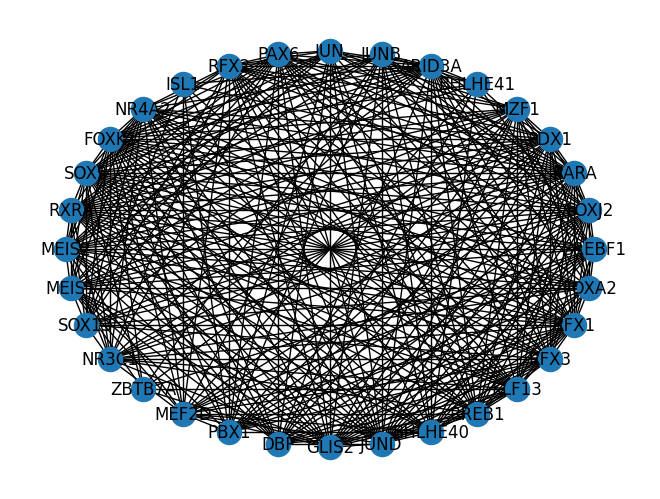

In [78]:
nx.draw_circular(G, with_labels=True)

In [18]:
# https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
net = Network(notebook=True)
net.from_nx(G)
net.repulsion()
net.show('network.html')

NameError: name 'Network' is not defined

In [19]:
nodeListPaper = ['JUNB', 'ISL1', 'INSM1', 'HOXC4', 'GLIS3', 'FOXK1', 'BHLHE40', 'BHLHE41', 'ZBTB16', 'TFEB', 'SOX9', 'SOX11', 'RREB1', 'RARB', 'POU2F2', 'PKNOX2', 'PDX1', 'PAX6', 'PAX4', 'ONECUT1', 'NR4A2', 'NR3C1', 'NKX6-3', 'NKX6-1', 'MNX1', 'MEIS1', 'MAFA', 'MX1B', 'KLF3']

edgeListRecap = []
for pair in pairs:
    if nodeListPaper.count(pair[0]) and nodeListPaper.count(pair[1]):
        edgeListRecap.append(pair)
        
edgeListRecap[:5]


[['PDX1', 'PAX6'],
 ['PDX1', 'NR4A2'],
 ['PDX1', 'FOXK1'],
 ['PDX1', 'SOX9'],
 ['PDX1', 'MEIS1']]

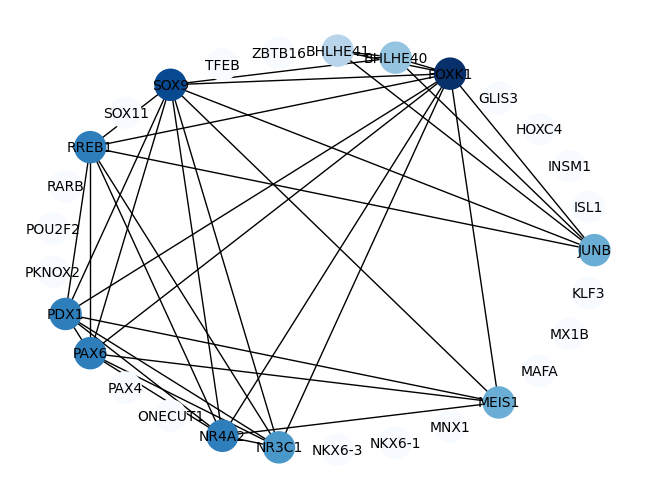

In [20]:
# fill up the graph
G = nx.Graph()
G.add_nodes_from(nodeListPaper)
G.add_edges_from(edgeListRecap)
node_color = [G.degree(v) for v in G]
nx.draw_circular(G, with_labels=True, node_size=500, font_size=10, node_color=node_color, cmap=plt.cm.Blues)

In [21]:
# count the occurences of the TFs accross the loops
dicoTFinloopsCounts={}
for clique in cliqueList:
    for TF in clique:
        if dicoTFinloopsCounts.__contains__(TF):
            dicoTFinloopsCounts[TF] += 1
        else:
            dicoTFinloopsCounts[TF] = 1

dict(list(dicoTFinloopsCounts.items())[0:5])

{'FOXK1': 163, 'MEF2D': 19, 'RARA': 145, 'BHLHE41': 10, 'JUNB': 33}

In [22]:
dicoTFinloopsCountsDict = pd.DataFrame.from_dict(dicoTFinloopsCounts, orient='index')
dicoTFinloopsCountsDict

,0
FOXK1,163
MEF2D,19
RARA,145
BHLHE41,10
JUNB,33
BHLHE40,44
SREBF1,51
FOXJ2,152
RFX1,256
PBX1,20


In [88]:
# calculate a score by CRC
cliqueRanking = []
for clique in cliqueList:
    cliqueScore = 0
    for TF in clique:
        cliqueScore = (float(cliqueScore) + (float(dicoTFinloopsCounts[TF])))
    cliqueRanking.append((clique, cliqueScore/len(clique), len(clique)))
cliqueRanking[:5]

[(['ISL1', 'RARA', 'SOX13'], 59.0, 3),
 (['ISL1', 'RARA', 'PBX1', 'MEF2D'], 47.5, 4),
 (['ISL1', 'RARA', 'JUND', 'KLF13'], 102.0, 4),
 (['ISL1', 'RARA', 'JUND', 'MEF2D'], 85.5, 4),
 (['ISL1', 'ARID3A', 'SOX13'], 45.0, 3)]

In [225]:
# in-and-out degree
# first count edges
# query spped of dictionary >> list
edgeCountDict = {}
for clique in cliqueList:
    for TF in clique:
        for (source, target) in zip([TF] * len(clique), clique):
            if (source, target) not in edgeCountDict.keys():
                edgeCountDict[(source, target)] = 0
            else:
                edgeCountDict[(source, target)] += 1
                
degreeDict = {}
for (source, target) in edgeCountDict.keys():
    if source not in degreeDict.keys():
        degreeDict[source] = 0
    else:
        degreeDict[source] += 1

dict(list(degreeDict.items())[0:5])

{'FOXK1': 29, 'MEF2D': 20, 'RARA': 28, 'BHLHE41': 10, 'SREBF1': 21}

In [226]:
degree = pd.DataFrame(degreeDict.items(), columns=['TF','degree'])
# degree = pd.DataFrame.from_dict(degreeDict, orient='index')
degree.sort_values(by=['degree', 'TF'], ascending=[False, True], inplace=True)
degree.head(5)

,TF,degree
0,FOXK1,29
2,RARA,28
7,RFX1,28
20,SOX9,28
8,FOXJ2,27


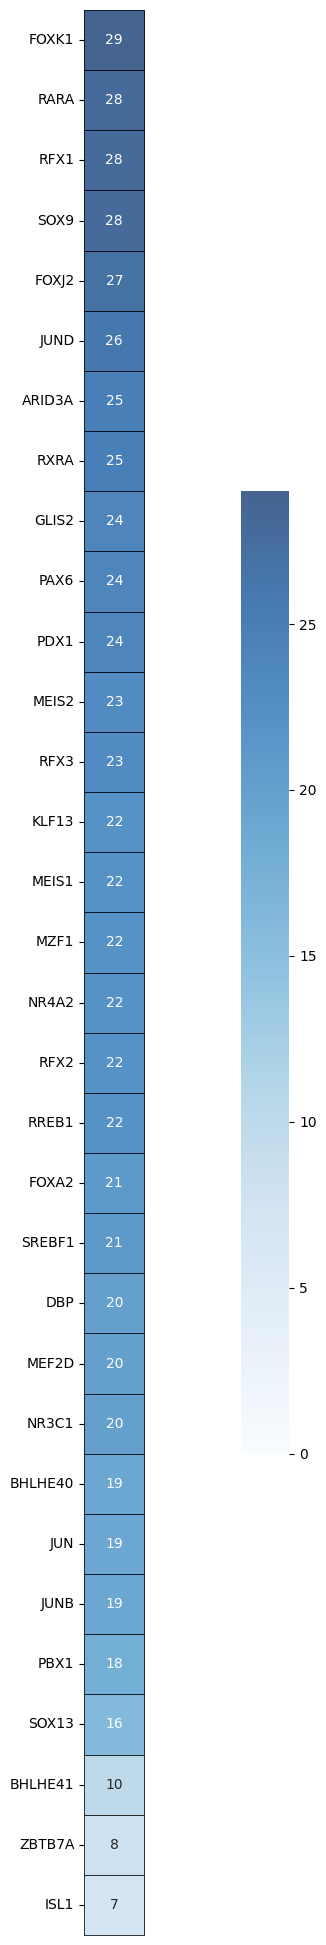

In [227]:
# ref: https://indianaiproduction.com/seaborn-heatmap/
# CRC TF of primary beta cell
plt.figure(figsize=(25,25), dpi=100)
cbar_kws = {'shrink':0.5,}
kwargs = {'alpha':.75, 'linewidths':0.5, 'linecolor':'k', 'cmap': 'Blues', 'vmin': 0, 
          'clip_on':False, 'annot': True, 'fmt':'g', 'square': True, 'xticklabels': False,
          'yticklabels': degree['TF'].to_list(),
          'cbar_kws': cbar_kws}
# sns.heatmap([degree['degree'].to_list()], **kwargs)
sns.heatmap(np.array([degree['degree'].to_list()]).T, **kwargs)
plt.yticks(rotation=0)
plt.show()

## CRC of beta cell in the paper

In [284]:
import pandas as pd
import sys
sys.path.append('/project/NeuralNet/software/miniconda3/envs/genetics/lib/python3.7/site-packages')
import openpyxl

In [243]:
wb = pd.ExcelFile('/home/jieyidi/Downloads/Meissner2019/1-s2.0-S1934590919304667-mmc7_CRC.xlsx')

In [244]:
wb.sheet_names

['hPSC', 'DE', 'PP1', 'PP2', 'EN', 'SC-beta', 'PH', 'Alpha', 'Beta']

In [290]:
betaCRCinPaper = wb.parse('Beta')
betaCRCinPaper.head(5)

,CRC#,CRC_TFs,score,#TFs
0,1,"['FOXK1', 'HES1', 'FOXA2', 'MAFA', 'RREB1', 'M...",412.705882,17
1,2,"['FOXK1', 'HES1', 'FOXA2', 'MAFA', 'RREB1', 'M...",411.823529,17
2,3,"['FOXK1', 'HES1', 'FOXA2', 'MAFA', 'RREB1', 'M...",400.705882,17
3,4,"['FOXK1', 'HES1', 'FOXA2', 'MAFA', 'RREB1', 'M...",400.312500,16
4,5,"['FOXK1', 'HES1', 'FOXA2', 'MAFA', 'RREB1', 'M...",399.823529,17


In [291]:
cliqueList = []
for i in betaCRCinPaper['CRC_TFs']:
    cliqueList.append(eval(i))
cliqueList[0]

['FOXK1',
 'HES1',
 'FOXA2',
 'MAFA',
 'RREB1',
 'MEIS2',
 'PDX1',
 'PAX6',
 'MEF2D',
 'SMAD3',
 'NFE2L2',
 'INSM1',
 'RFX2',
 'KLF13',
 'RARA',
 'SOX13',
 'NKX2-2']

In [292]:
# count the occurences of the TFs accross the loops
dicoTFinloopsCounts={}
for clique in cliqueList:
    for TF in clique:
        if dicoTFinloopsCounts.__contains__(TF):
            dicoTFinloopsCounts[TF] += 1
        else:
            dicoTFinloopsCounts[TF] = 1

dict(list(dicoTFinloopsCounts.items())[0:5])

{'FOXK1': 562, 'HES1': 103, 'FOXA2': 594, 'MAFA': 413, 'RREB1': 525}

In [293]:
dicoTFinloopsCountsDict = pd.DataFrame.from_dict(dicoTFinloopsCounts, orient='index')
dicoTFinloopsCountsDict.head(5)

,0
FOXK1,562
HES1,103
FOXA2,594
MAFA,413
RREB1,525


In [294]:
# calculate a score by CRC
cliqueRanking = []
for clique in cliqueList:
    cliqueScore = 0
    for TF in clique:
        cliqueScore = (float(cliqueScore) + (float(dicoTFinloopsCounts[TF])))
    cliqueRanking.append((clique, cliqueScore/len(clique), len(clique)))
cliqueRanking[:1]

[(['FOXK1',
   'HES1',
   'FOXA2',
   'MAFA',
   'RREB1',
   'MEIS2',
   'PDX1',
   'PAX6',
   'MEF2D',
   'SMAD3',
   'NFE2L2',
   'INSM1',
   'RFX2',
   'KLF13',
   'RARA',
   'SOX13',
   'NKX2-2'],
  412.70588235294116,
  17)]

In [295]:
# in-and-out degree
# first count edges
# query spped of dictionary >> list
edgeCountDict = {}
for clique in cliqueList:
    for TF in clique:
        for (source, target) in zip([TF] * len(clique), clique):
            if (source, target) not in edgeCountDict.keys():
                edgeCountDict[(source, target)] = 0
            else:
                edgeCountDict[(source, target)] += 1
                
degreeDict = {}
for (source, target) in edgeCountDict.keys():
    if source not in degreeDict.keys():
        degreeDict[source] = 0
    else:
        degreeDict[source] += 1

dict(list(degreeDict.items())[0:5])

{'FOXK1': 44, 'HES1': 30, 'FOXA2': 44, 'MAFA': 42, 'RREB1': 43}

In [296]:
degree = pd.DataFrame(degreeDict.items(), columns=['TF','degree'])
# degree = pd.DataFrame.from_dict(degreeDict, orient='index')
degree.sort_values(by=['degree', 'TF'], ascending=[False, True], inplace=True)
degree.head(5)

,TF,degree
2,FOXA2,44
0,FOXK1,44
26,TEAD1,44
11,INSM1,43
5,MEIS2,43


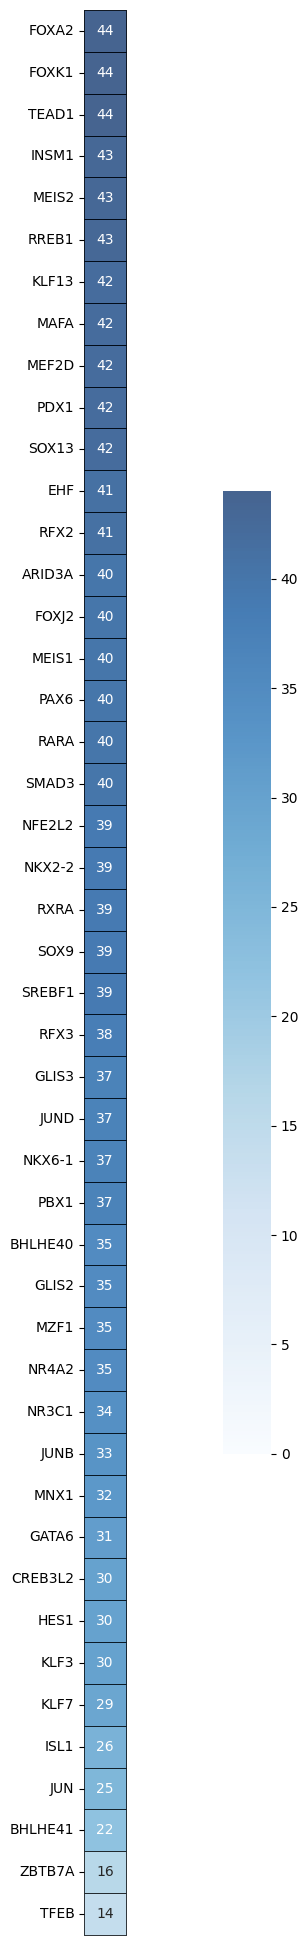

In [297]:
# ref: https://indianaiproduction.com/seaborn-heatmap/
# CRC TF of primary beta cell
plt.figure(figsize=(25,25), dpi=100)
cbar_kws = {'shrink':0.5,}
kwargs = {'alpha':.75, 'linewidths':0.5, 'linecolor':'k', 'cmap': 'Blues', 'vmin': 0, 
          'clip_on':False, 'annot': True, 'fmt':'g', 'square': True, 'xticklabels': False,
          'yticklabels': degree['TF'].to_list(),
          'cbar_kws': cbar_kws}
# sns.heatmap([degree['degree'].to_list()], **kwargs)
sns.heatmap(np.array([degree['degree'].to_list()]).T, **kwargs)
plt.yticks(rotation=0)
plt.show()

## recreate beta-cell CRC network in the paper

In [298]:
nodeListPaper = ['JUNB', 'ISL1', 'INSM1', 'HOXC4', 'GLIS3', 'FOXK1', 'BHLHE40', 'BHLHE41', 'ZBTB16', 'TFEB', 'SOX9', 'SOX11', 'RREB1', 'RARB', 'POU2F2', 'PKNOX2', 'PDX1', 'PAX6', 'PAX4', 'ONECUT1', 'NR4A2', 'NR3C1', 'NKX6-3', 'NKX6-1', 'MNX1', 'MEIS1', 'MAFA', 'MX1B', 'KLF3']

edgeListPaper = []
for pair in edgeCountDict.keys():
    if nodeListPaper.count(pair[0]) and nodeListPaper.count(pair[1]):
        edgeListPaper.append(pair)
        
edgeListPaper[:5]

[('FOXK1', 'FOXK1'),
 ('FOXK1', 'MAFA'),
 ('FOXK1', 'RREB1'),
 ('FOXK1', 'PDX1'),
 ('FOXK1', 'PAX6')]

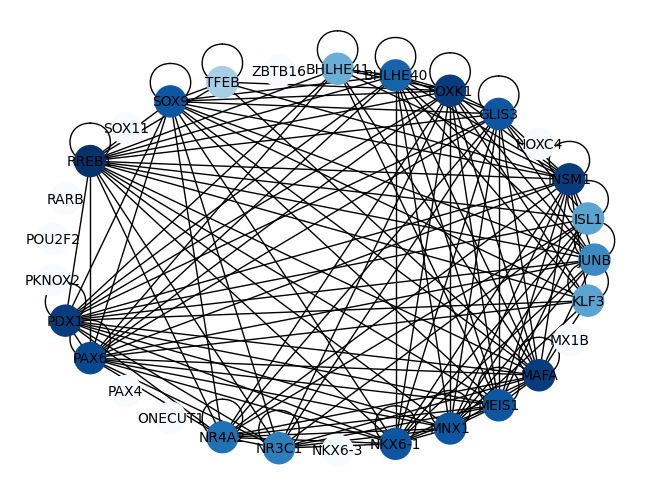

In [311]:
# fill up the graph
G = nx.Graph()
G.add_nodes_from(nodeListPaper)
G.add_edges_from(edgeListPaper)
node_color = [G.degree(v) for v in G]
nx.draw_circular(G, with_labels=True, node_size=500, font_size=10, node_color=node_color, cmap=plt.cm.Blues)

In [312]:
# https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
net = Network(notebook=True)
net.from_nx(G)
net.repulsion()
net.show('network.html')

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 
